<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning,-Data-Exploration-&amp;-Feature-Engineering" data-toc-modified-id="Data-Cleaning,-Data-Exploration-&amp;-Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning, Data Exploration &amp; Feature Engineering</a></span></li><li><span><a href="#Dealing-with-remaining-missing-values" data-toc-modified-id="Dealing-with-remaining-missing-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dealing with remaining missing values</a></span></li><li><span><a href="#Drop-useless-features" data-toc-modified-id="Drop-useless-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Drop useless features</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Final-Predictions" data-toc-modified-id="Final-Predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final Predictions</a></span></li></ul></div>

# Titanic - Machine Learning from Disaster

**Objective:** use machine learning algorithms to create a model that predicts which passengers survived the Titanic shipwreck.

**The Challenge**: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

The focus of this work is to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Data:**
 Two similar datasets from Kaggle that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv contains the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. 

Using the patterns found in the train.csv data, the goal is to predict whether the other 418 passengers on board (found in test.csv) survived.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning,-Data-Exploration-&amp;-Feature-Engineering" data-toc-modified-id="Data-Cleaning,-Data-Exploration-&amp;-Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning, Data Exploration &amp; Feature Engineering</a></span></li><li><span><a href="#Dealing-with-remaining-missing-values" data-toc-modified-id="Dealing-with-remaining-missing-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dealing with remaining missing values</a></span></li><li><span><a href="#Drop-useless-features" data-toc-modified-id="Drop-useless-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Drop useless features</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Final-Predictions" data-toc-modified-id="Final-Predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final Predictions</a></span></li></ul></div>

### Data Cleaning, Data Exploration & Feature Engineering

Import important libraries

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Load the train and test dataset

In [125]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
test.h                                        ead()

SyntaxError: invalid syntax (<ipython-input-127-aa7c308fc23a>, line 1)

Size of the train dataset

In [ ]:
                                                                                             train.shape

Size of the test dataset

In [ ]:
test.shape

**Target Feature**
- Survived: 1 for Yes and 0 for No

**Predictors**
- Pclass: Ticket Class, 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex: Sex
- Age: Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train.head()

In [ ]:
test.head()

Now let's study each attribute

**Survived**

Type


In [ ]:
train['Survived'].dtype

Missing values

In [ ]:
train['Survived'].isnull().sum()

Values

In [ ]:
train['Survived'].value_counts()

In this dataset 62% of the instances did not survived the shipwreck.

In [ ]:
cat_num = train['Survived'].value_counts()
plt.figure(figsize = (10,5))
sns.barplot(x=cat_num.index, y = cat_num)
plt.title('Survived: 1 - Yes , 2 - No')
plt.ylabel('Total')
plt.show()

---

**Pclass**

Type

In [ ]:
train['Pclass'].dtype

Pclass is a categorical variable, not an integer.

In [ ]:
train['Pclass']=train['Pclass'].astype('O')
test['Pclass']=test['Pclass'].astype('O')

In [ ]:
train['Pclass'].dtype

Missing values

In [ ]:
train['Pclass'].isnull().sum()

In [ ]:
test['Pclass'].isnull().sum()

Values

In [ ]:
train['Pclass'].value_counts()

In [ ]:
cat_num = train['Pclass'].value_counts()
plt.figure(figsize = (10,5))
sns.barplot(x=cat_num.index, y = cat_num)
plt.title('Passenger class: 1 - Upper , 2 - Middle, 3 - Lower')
plt.ylabel('Total')
plt.show()

Correlation with the target variable

In [ ]:
grp = train.groupby('Pclass').sum()
grp

In [ ]:
x_ = grp.index
x_

In [ ]:
#Calculate percentage of survival by pasengers class
survived_precentage = []
#Number of passengers per class
pclass_count = [216, 184, 491]
for i, survived in enumerate(grp['Survived']):
    perc = (survived/(pclass_count[i]))*100
    print('Number of passengers of class {} is {}'.format(i+1, pclass_count[i]))
    print('Percentage of passenger class {} which survived = {}'.format(i+1,perc))
    survived_precentage.append(perc)


In [ ]:
y_ = survived_precentage
y_

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x=x_, y = y_)
plt.title('Percentage of survival for each passenger class')
plt.ylabel('Percentage of survival (Survivals of class n/Passengers of class n)')
plt.xlabel('Passenger class')
plt.show()

Seems like passengers travelling in a higher class had a higher chance of survival. This results can identify that passengers travelling in a higher class might had priority or easier access to the rescue boats inside the Titanic.

---

**Sex**

Type

In [ ]:
train['Sex'].dtype

Missing values

In [ ]:
train['Sex'].isnull().sum()

In [ ]:
test['Sex'].isnull().sum()

Values

In [ ]:
train['Sex'].value_counts()

65% of the passengers in the train dataset are male.

In [ ]:
cat_num = train['Sex'].value_counts()
plt.figure(figsize = (10,5))
sns.barplot(x=cat_num.index, y = cat_num)
plt.title('Sex')
plt.ylabel('Total')
plt.show()

Correlation with the target variable

In [ ]:
grp = train.groupby('Sex').sum()
grp

In [ ]:
x_ = grp.index
x_

In [ ]:
sex_f = train['Sex'].value_counts().to_frame()
sex_f

In [ ]:
#Percentage of males that survived
perc_male = (109/577)*100

#Percentage of females that survived
perc_female = (233/314)*100

In [ ]:
y_ = [perc_female, perc_male]

plt.figure(figsize = (10,10))
sns.barplot(x=x_, y = y_)
plt.title('Percentage of survival per sex')
plt.ylabel('Percentage of survival')
plt.xlabel('Passenger sex')
plt.show()

In [ ]:
y_

A much higher percentage of females survived comparing to the percentage of males that survived. This result tends to lead to a conclusion that women had priority to the rescue boats of the Titanic.

---

**Age**

Type

In [ ]:
train['Age'].dtype

Missing values

In [ ]:
train['Age'].isnull().sum()

20% of the values are null in the training set. 

In [ ]:
test['Age'].isnull().sum()

21% of the values are null in the testing set.

Values

In [128]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [129]:
train['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

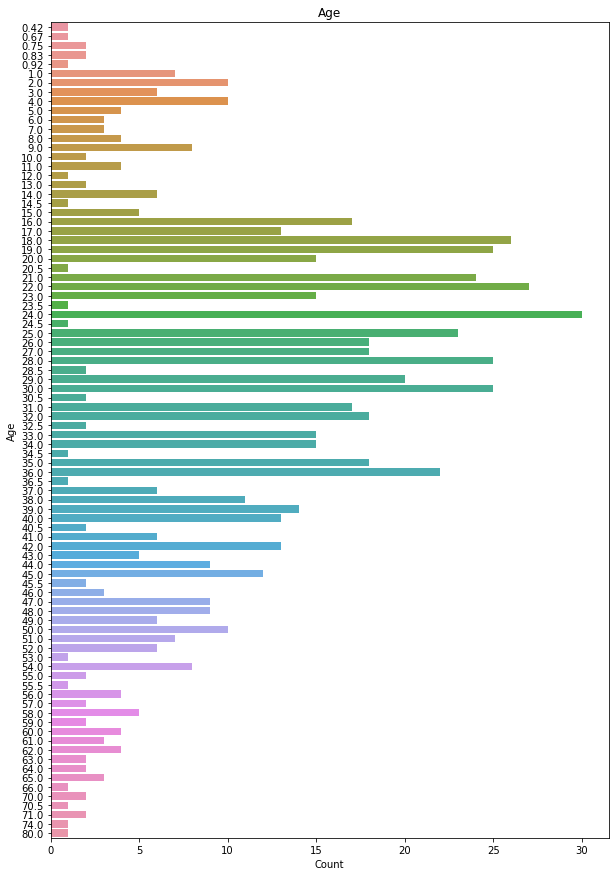

In [130]:
cat_num = train['Age'].value_counts()
plt.figure(figsize = (10,15))
sns.barplot(y=cat_num.index, x=cat_num, orient = 'h')
plt.title('Age')
plt.ylabel('Age')
plt.xlabel('Count')
plt.show()

This dataset has a wide spectrum of ages. Since babies without a year completed till elderlies with 80 years. 

<AxesSubplot:ylabel='Age'>

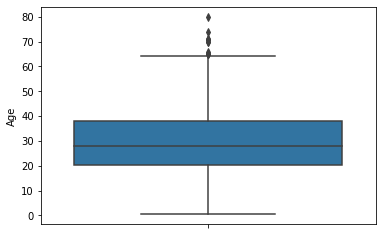

In [131]:
sns.boxplot(y=train['Age'])

<AxesSubplot:>

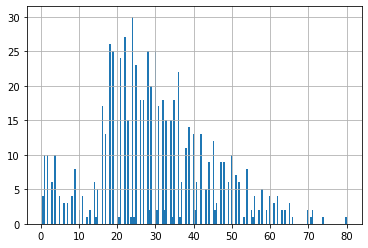

In [132]:
train['Age'].hist(bins = 200)

This predictor tends to follow a normal distribution. 

Correlation with the target variable

I'm gonna create a few groups of ages to analyse rates of survival. This predictors are:
- `Baby`: age less than 1 year
- `Toddler`: age between [1,6[ years old 
- `Pre-Adolescent`: age between [6,12[ years old
- `Adolescent`: age between [12,21[ years old
- `Young Adult`: age between [21,35[ years old
- `Middle Age`: age between [35,50[ years old
- `Later Adult`: age between [50,65[ years old
- `Old Person`: age between [65,75[ years old
- `Elder`: age higher or equal to 75 years old


Predictor `Baby`

In [133]:
train['Baby'] = train['Age'].apply(lambda x: 1 if x<1 else 0).to_frame()
train['Baby']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Baby, Length: 891, dtype: int64

In [134]:
train['Baby'].value_counts()

0    884
1      7
Name: Baby, dtype: int64

There are 7 babys in the training dataset.

In [135]:
train[train['Baby']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Baby
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,1
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,1
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,1
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,1
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,1
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,1
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,1


All the babys in the dataset survived.

Predictor `Toddler`

In [136]:
train['Toddler'] = train['Age'].apply(lambda x: 1 if x>=1 and x<6 else 0)
train[['Toddler']]

,Toddler
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [137]:
train['Toddler'].value_counts()

0    854
1     37
Name: Toddler, dtype: int64

There are 37 toddlers in the training dataset.

In [138]:
train[train['Toddler']==1]['Survived'].value_counts()

1    24
0    13
Name: Survived, dtype: int64

Aproximatly  65% of the Toddlers survived.

In [139]:
train[['Age', 'Survived']][train['Toddler']==1]

,Age,Survived
7,2.0,0
10,4.0,1
16,2.0,0
43,3.0,1
58,5.0,1
63,4.0,0
119,2.0,0
164,1.0,0
171,4.0,0
172,1.0,1


Predictor `Pre-Adolescent`

In [140]:
train['Pre-Adolescent'] = train['Age'].apply(lambda x: 1 if x>=6 and x<12 else 0)
train[['Pre-Adolescent']]

,Pre-Adolescent
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [141]:
train['Pre-Adolescent'].value_counts()

0    867
1     24
Name: Pre-Adolescent, dtype: int64

There are 24 pre-adolescents in the dataset.

In [142]:
train[train['Pre-Adolescent']==1]['Survived'].value_counts()

0    16
1     8
Name: Survived, dtype: int64

Only 33.33% of the pre-adolescents survived.

Predictor `Adolescent`

In [143]:
train['Adolescent'] = train['Age'].apply(lambda x: 1 if x>=12 and x<21 else 0)
train[['Adolescent']]

,Adolescent
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,1
888,0
889,0


In [144]:
train['Adolescent'].value_counts()

0    779
1    112
Name: Adolescent, dtype: int64

There are 112 adolescents in the dataset.

In [145]:
train[train['Adolescent']==1]['Survived'].value_counts()

0    69
1    43
Name: Survived, dtype: int64

Aproximatly 38% of the adolescents survived.


Predictor `Young Adult`

In [146]:
train['Young_Adult'] = train['Age'].apply(lambda x: 1 if x>=21 and x<35 else 0)
train[['Young_Adult']]

,Young_Adult
0,1
1,0
2,1
3,0
4,0
...,...
886,1
887,0
888,0
889,1


In [147]:
train['Young_Adult'].value_counts()

0    592
1    299
Name: Young_Adult, dtype: int64

There are 299 young adults in the dataset.

In [148]:
train[train['Young_Adult']==1]['Survived'].value_counts()

0    185
1    114
Name: Survived, dtype: int64

Aproximatly 38% of the young adults survived.

Predictor `Middle Age`

In [149]:
train['Middle_Age'] = train['Age'].apply(lambda x: 1 if x>=35 and x<50 else 0)
train[['Middle_Age']]

,Middle_Age
0,0
1,1
2,0
3,1
4,1
...,...
886,0
887,0
888,0
889,0


In [150]:
train['Middle_Age'].value_counts()

0    730
1    161
Name: Middle_Age, dtype: int64

There are 161 middle aged people in the data set.

In [151]:
train[train['Middle_Age']==1]['Survived'].value_counts()

0    94
1    67
Name: Survived, dtype: int64

Aproximatly 42% of the middle aged group survived.

Predictor `Later_Adult`

In [152]:
train['Later_Adult'] = train['Age'].apply(lambda x: 1 if x>=50 and x<65 else 0)
train[['Later_Adult']]

,Later_Adult
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [153]:
train['Later_Adult'].value_counts()

0    828
1     63
Name: Later_Adult, dtype: int64

There are 63 later adults in the dataset.

In [154]:
train[train['Later_Adult']==1]['Survived'].value_counts()

0    37
1    26
Name: Survived, dtype: int64

Aproximatly 41% of the later adults survived.

Predictor `Old Person`

In [155]:
train['Old_Person'] = train['Age'].apply(lambda x: 1 if x>=65 and x<75 else 0)
train[['Old_Person']]

,Old_Person
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [156]:
train['Old_Person'].value_counts()

0    881
1     10
Name: Old_Person, dtype: int64

There are 10 people in the class Old Person in the dataset.

In [157]:
train[train['Old_Person']==1]['Survived'].value_counts()

0    10
Name: Survived, dtype: int64

All of the instances of the category Old Person did not survived.

Predictor `Elder`

In [158]:
train['Elder'] = train['Age'].apply(lambda x: 1 if x>=75 else 0)
train[['Elder']]

,Elder
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [159]:
train['Elder'].value_counts()

0    890
1      1
Name: Elder, dtype: int64

Only one person in the dataframe is Elder, so I'm gonna unify Elders and Old People.

In [160]:
train['Old_Person'] = train['Age'].apply(lambda x: 1 if x>=65 else 0)
train[['Old_Person']]

,Old_Person
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,0
889,0


In [161]:
train[['Old_Person']].value_counts()

Old_Person
0             880
1              11
dtype: int64

In [162]:
train[train['Old_Person']==1]['Survived'].value_counts()

0    10
1     1
Name: Survived, dtype: int64

The oldest person onboard in this dataset survived. 

In [163]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Baby', 'Toddler',
       'Pre-Adolescent', 'Adolescent', 'Young_Adult', 'Middle_Age',
       'Later_Adult', 'Old_Person', 'Elder'],
      dtype='object')

In [164]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [165]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Baby', 'Toddler',
       'Pre-Adolescent', 'Adolescent', 'Young_Adult', 'Middle_Age',
       'Later_Adult', 'Old_Person', 'Elder'],
      dtype='object')

In [166]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Baby,Toddler,Pre-Adolescent,Adolescent,Young_Adult,Middle_Age,Later_Adult,Old_Person,Elder
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,0,0,0,1,0,0,0


Graph with percentage of survival for each age group

In [167]:
age_pred = ['Baby','Toddler', 'Pre-Adolescent', 'Adolescent', 'Young_Adult', 'Middle_Age', 'Later_Adult', 'Old_Person']
percentage_survived = []

for pred in age_pred:
    number_of_positive_instances = train[pred].sum()
    survived = train[train[pred]==1]['Survived'].sum()
    percentage = survived/number_of_positive_instances*100
    percentage_survived.append(percentage)

In [168]:
percentage_survived

[100.0,
 64.86486486486487,
 33.33333333333333,
 38.392857142857146,
 38.12709030100335,
 41.61490683229814,
 41.269841269841265,
 9.090909090909092]

Text(0, 0.5, 'Percentage of Survival')

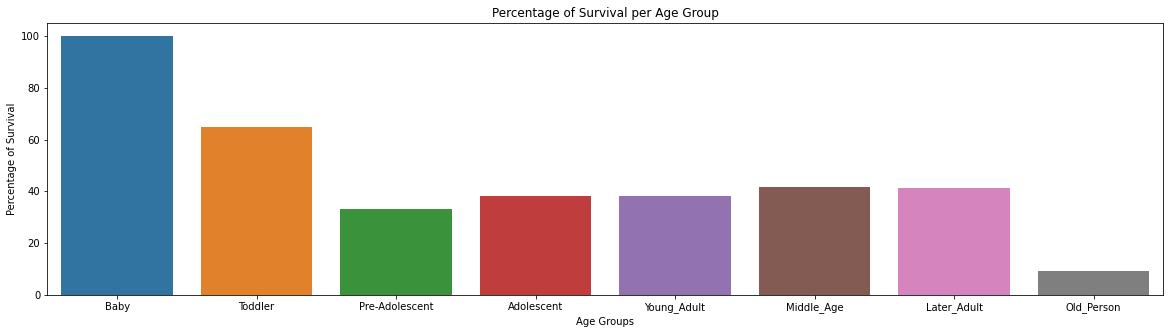

In [169]:
plt.figure(figsize=(20,5))
sns.barplot(x=age_pred, y=percentage_survived)
plt.title('Percentage of Survival per Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Survival')

The percentages of survival of people aging 6 to 65 is identical. The high percentages of survival of the Babys and Toddlers leads to a premature conclusion that this age groups had priority to the rescue boats.

In [170]:
train = train.drop(['Baby','Toddler','Pre-Adolescent','Adolescent','Young_Adult',
                    'Middle_Age','Later_Adult','Old_Person'], axis = 1)

In [171]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Elder'],
      dtype='object')

In [172]:
train = train.drop('Elder', axis=1)

In [173]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [174]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

---

**SibSp**

Type

In [175]:
train['SibSp'].dtype

dtype('int64')

Missing values

In [176]:
train['SibSp'].isnull().sum()

0

In [177]:
test['SibSp'].isnull().sum()

0

Values

In [178]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [179]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

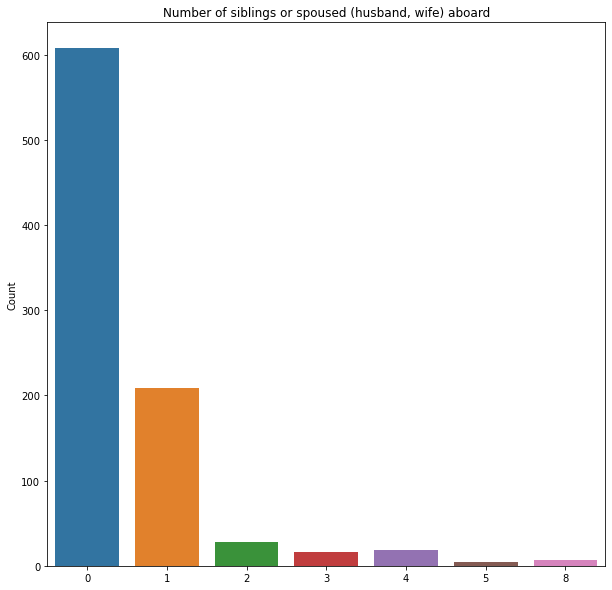

In [180]:
cat_num = train['SibSp'].value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x=cat_num.index, y=cat_num)
plt.title('Number of siblings or spoused (husband, wife) aboard')
plt.ylabel('Count')
plt.show()

The great majority of the passengers traveled with none or one sibling or spouse.

<AxesSubplot:>

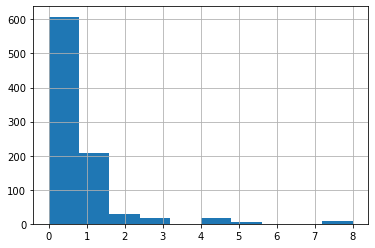

In [181]:
train['SibSp'].hist()

---

**Parch**

Type

In [182]:
train['Parch'].dtype

dtype('int64')

Missing values

In [183]:
train['Parch'].isnull().sum()

0

In [184]:
test['Parch'].isnull().sum()

0

Values

In [185]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [186]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

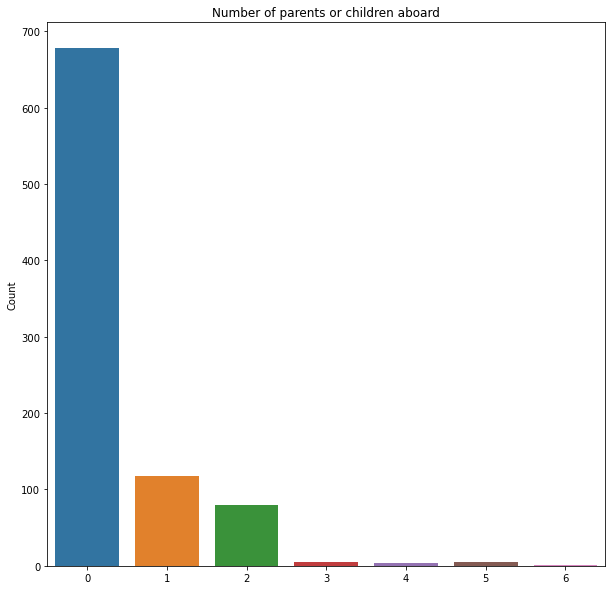

In [187]:
cat_num = train['Parch'].value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x=cat_num.index, y=cat_num)
plt.title('Number of parents or children aboard')
plt.ylabel('Count')
plt.show()

The vast majority of the dataset has instaces with zero, one or two parents or children aboard. 

<AxesSubplot:>

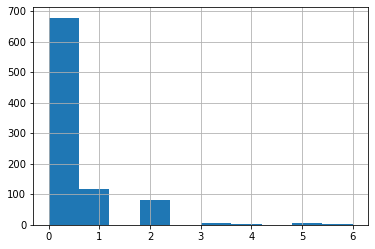

In [188]:
train['Parch'].hist()

---

**New feature - `Family_Size`**

This feature is a combination of `SibSp` and `Parch`, refleting the size of the family aboard for each individual. 

In [189]:
train['Family_Size'] = train['SibSp']+train['Parch']+1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [190]:
test['Family_Size'] =test['SibSp']+test['Parch']+1

Type

In [191]:
train['Family_Size'].dtypes

dtype('int64')

Missing Values

In [192]:
train['Family_Size'].isnull().sum()

0

In [193]:
test['Family_Size'].isnull().sum()

0

Values

In [194]:
train['Family_Size'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family_Size, dtype: float64

<AxesSubplot:>

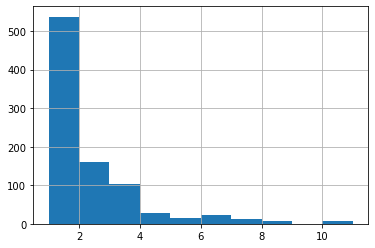

In [195]:
train['Family_Size'].hist()

In [196]:
train['Family_Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_Size, dtype: int64

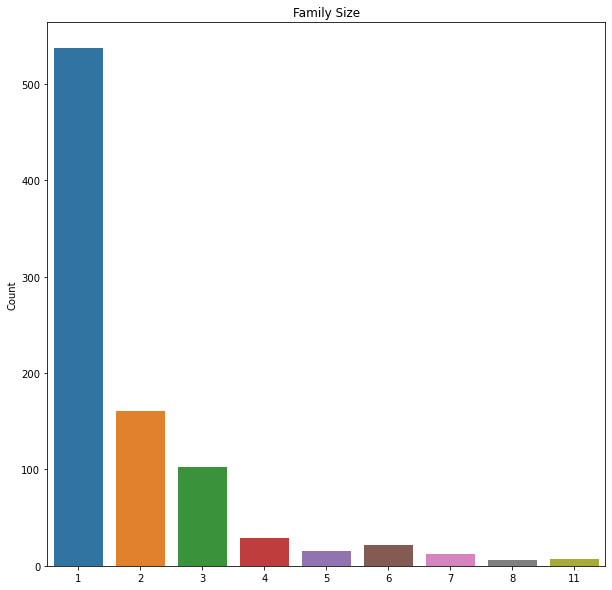

In [197]:
cat_num = train['Family_Size'].value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x=cat_num.index, y=cat_num)
plt.title('Family Size')
plt.ylabel('Count')
plt.show()

<AxesSubplot:ylabel='Family_Size'>

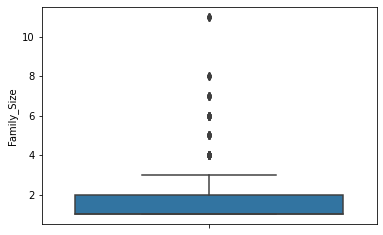

In [198]:
sns.boxplot(y=train['Family_Size'])

The great majority of the passengers traveled with no relatives. 

In [199]:
survived_count = train.groupby('Family_Size').sum()['Survived']
survived_count

Family_Size
1     163
2      89
3      59
4      21
5       3
6       3
7       4
8       0
11      0
Name: Survived, dtype: int64

In [200]:
count = train.groupby('Family_Size').count()['Survived']
count

Family_Size
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: Survived, dtype: int64

In [201]:
percentage_survived = []

for survivals, total in zip(survived_count, count):
    perc = survivals/total *100
    percentage_survived.append(perc)

In [202]:
sorted(train['Family_Size'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 11]

Text(0, 0.5, 'Percentage of Survival')

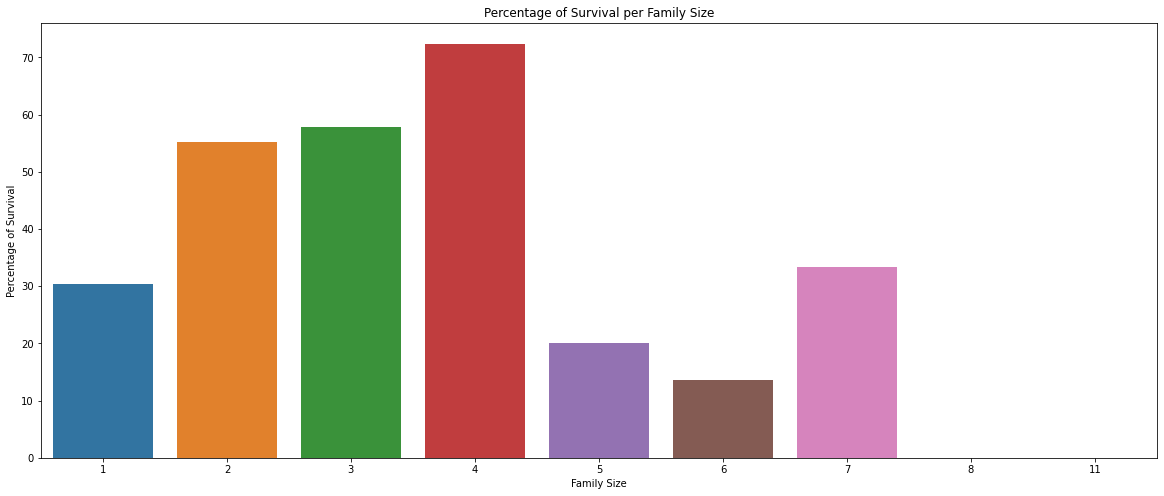

In [203]:
plt.figure(figsize=(20,8))
sns.barplot(x=sorted(train['Family_Size'].unique()), y=percentage_survived)
plt.title('Percentage of Survival per Family Size')
plt.xlabel('Family Size')
plt.ylabel('Percentage of Survival')

<AxesSubplot:xlabel='Family_Size', ylabel='Age'>

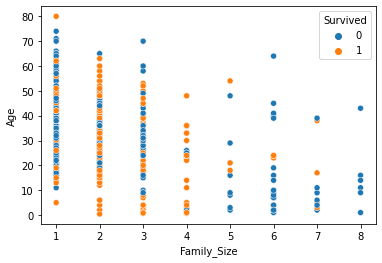

In [204]:
sns.scatterplot(data=train, x='Family_Size', y='Age', hue='Survived')

---

**New feature - `Is_Alone`**

This predictor is null when the passenger is travelling without any family member. 

In [205]:
train['Is_Alone'] = 0
test['Is_Alone'] = 0

In [206]:
train['Is_Alone'] = train['Family_Size'].apply(lambda x: 1 if x==1 else 0)
test['Is_Alone'] = test['Family_Size'].apply(lambda x: 1 if x==1 else 0)

In [207]:
train[['Is_Alone','Family_Size']]

,Is_Alone,Family_Size
0,0,2
1,0,2
2,1,1
3,0,2
4,1,1
...,...,...
886,1,1
887,1,1
888,0,4
889,1,1


Type

In [208]:
train['Is_Alone'].dtypes

dtype('int64')

Values

In [209]:
train['Is_Alone'].value_counts()

1    537
0    354
Name: Is_Alone, dtype: int64

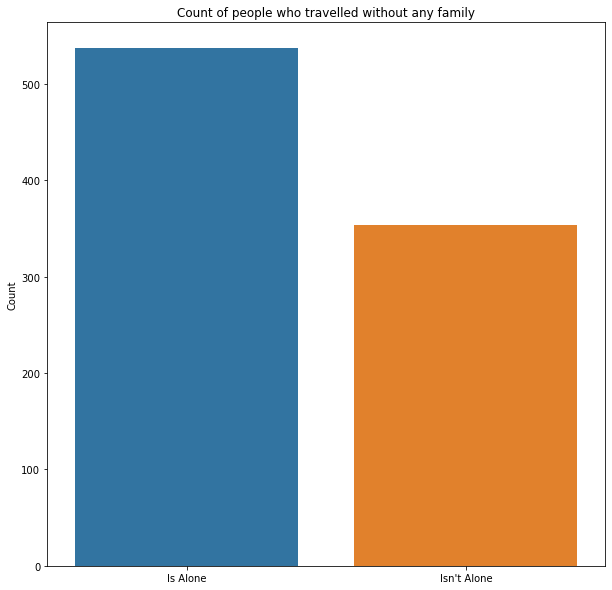

In [210]:
cat_num = train['Is_Alone'].value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x=["Is Alone","Isn't Alone"], y=cat_num)
plt.title('Count of people who travelled without any family')
plt.ylabel('Count')
plt.show()

There are actually more people who travelled alone. 

Survival Rates

In [211]:
train[train['Is_Alone']==1]['Survived'].sum()

163

163 people who travelled alone survived.

In [212]:
train[train['Is_Alone']==0]['Survived'].sum()

179

179 people who didn't travelled alone survived

Text(0, 0.5, 'Percentage of Survival')

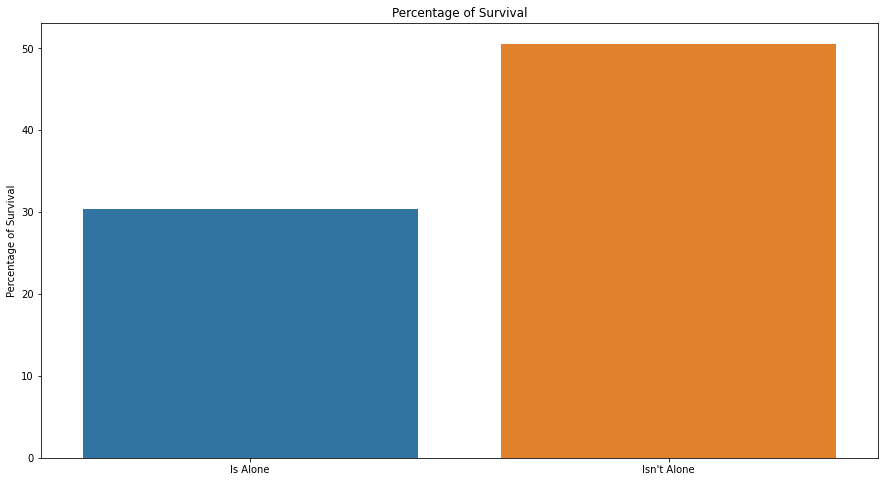

In [213]:
plt.figure(figsize=(15,8))
sns.barplot(x=['Is Alone', "Isn't Alone"], y=[163/537 * 100, 179/354 * 100])
plt.title('Percentage of Survival')
plt.ylabel('Percentage of Survival')

People who didn't travelled alone seems to have a higher chance of survival.

---

**Ticket**

Missing Values

In [214]:
train['Ticket'].isnull().sum()

0

Values

In [215]:
train['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
3101295              6
CA 2144              6
                    ..
233639               1
27849                1
SC/AH 29037          1
STON/O 2. 3101288    1
28425                1
Name: Ticket, Length: 681, dtype: int64

In [216]:
len(train['Ticket'].unique())

681

The dataset has 681 unique tickets.

In [217]:
train['Ticket'].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

---

**Fare**

Type

In [218]:
train['Fare'].dtype

dtype('float64')

Missing Values

In [219]:
train['Fare'].isnull().sum()

0

In [220]:
test['Fare'].isnull().sum()

1

In [221]:
train.shape

(891, 14)

In [222]:
test.shape

(418, 13)

Values

In [223]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

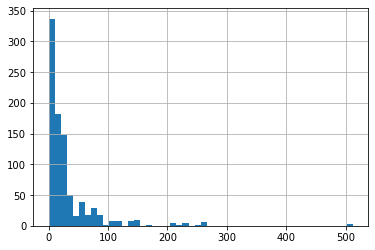

In [224]:
train['Fare'].hist(bins=50)

<AxesSubplot:ylabel='Fare'>

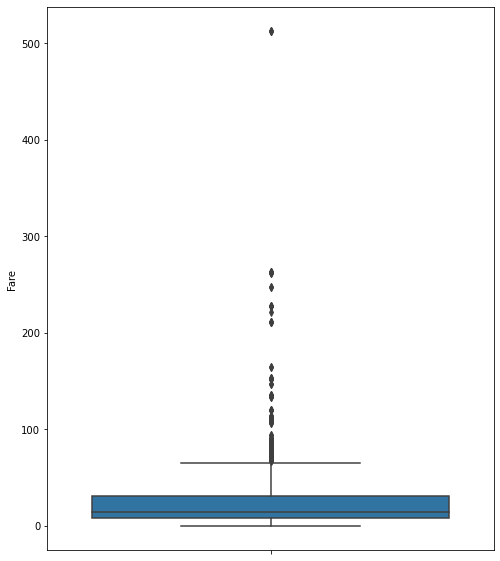

In [225]:
plt.figure(figsize=(8, 10))
sns.boxplot(y=train['Fare'])

This predictor has a lot of outliers.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

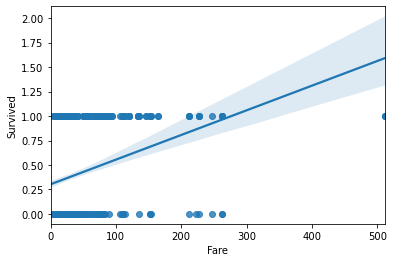

In [226]:
sns.regplot(x=train['Fare'], y=train['Survived'], fit_reg=True)

Seems like there is some correlation between the fare and the survived features. Although the standard error of the regression coefficients is quite high. 

In [227]:
out_fare = train['Fare'].max()
train[train['Fare']==out_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Is_Alone
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,1


The big outlier of the fare price is the same for three middle age instances.

---

**Cabin**

Type

In [228]:
train['Cabin'].dtype

dtype('O')

Missing Values

In [229]:
train['Cabin'].isnull().sum()

687

In [230]:
test['Cabin'].isnull().sum()

327

In [231]:
train.shape

(891, 14)

Aproximatly  77% of the cabin values are missing. This is an extremely high percentage so I decided to create a feature that tells whether a passenger had a cabin on the Titanic

In [232]:
train['Has_Cabin'] = train['Cabin'].isnull().apply(lambda x: 0 if x==True else 1)
test['Has_Cabin'] = test['Cabin'].isnull().apply(lambda x: 0 if x==True else 1)

In [233]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Is_Alone,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0


In [234]:
train['Has_Cabin'].value_counts()

0    687
1    204
Name: Has_Cabin, dtype: int64

In [235]:
train[train['Survived']==1]['Has_Cabin'].value_counts()

0    206
1    136
Name: Has_Cabin, dtype: int64

206 people who didn't have cabin survived and 136 who had cabin survived.

Text(0, 0.5, 'Percentage of Survival')

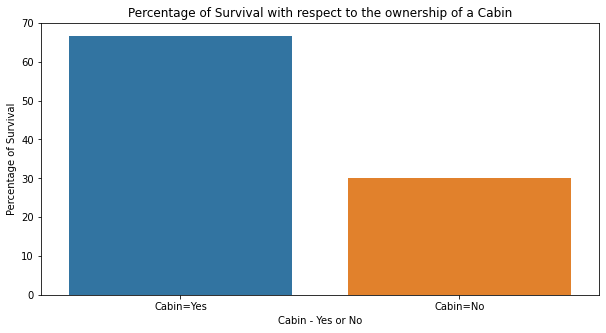

In [236]:
plt.figure(figsize=(10,5))
sns.barplot(x=['Cabin=Yes', 'Cabin=No'], y=[136/204*100, 206/687*100])
plt.title('Percentage of Survival with respect to the ownership of a Cabin')
plt.xlabel('Cabin - Yes or No')
plt.ylabel('Percentage of Survival')

A high of people who had a cabin actually survived. 

---

**Embarked**

Type

In [237]:
train['Embarked'].dtype

dtype('O')

Missing Values

In [238]:
train['Embarked'].isnull().sum()

2

In [239]:
train['Embarked'] = train['Embarked'].fillna('S')

In [240]:
train['Embarked'].isnull().sum()

0

In [241]:
test['Embarked'].isnull().sum()

0

Values

In [242]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

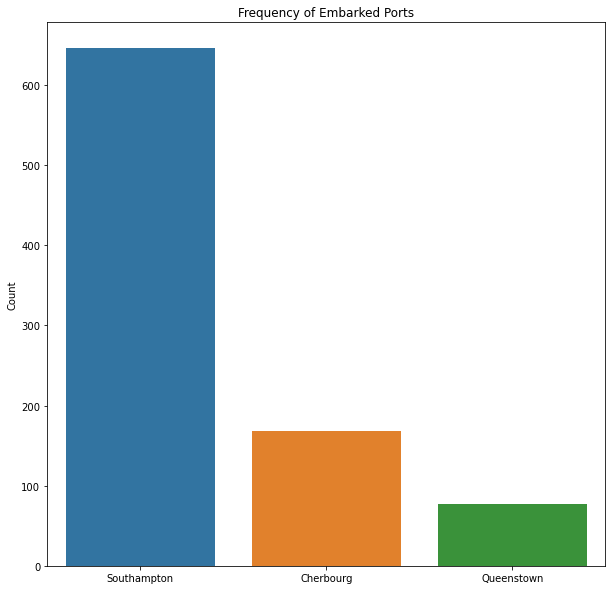

In [243]:
cat_num = train['Embarked'].value_counts()
plt.figure(figsize = (10,10))
sns.barplot(x=['Southampton','Cherbourg','Queenstown'], y=cat_num)
plt.title('Frequency of Embarked Ports')
plt.ylabel('Count')
plt.show()

The vast majority of people embarked in Southampton.

Graph of survival percentage per embarked port

In [244]:
#Total passengers for each port
total_S = 646
total_C = 168
total_Q = 77

#Total survived for each port
survived_S = train[train['Embarked']=='S']['Survived'].sum()
survived_C = train[train['Embarked']=='C']['Survived'].sum()
survived_Q = train[train['Embarked']=='Q']['Survived'].sum()

#Percentage of survival for each port
percentage_S = survived_S/total_S*100
percentage_C = survived_C/total_C*100
percentage_Q = survived_Q/total_Q*100

Text(0, 0.5, 'Percentage of Survival')

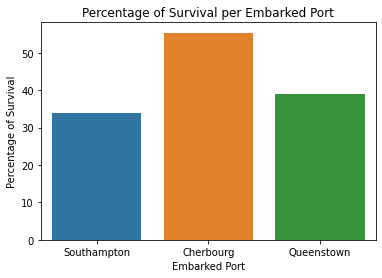

In [245]:
sns.barplot(x=['Southampton','Cherbourg','Queenstown'], y=[percentage_S, percentage_C, percentage_Q])
plt.title('Percentage of Survival per Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Percentage of Survival')

Seems like people who embarked in Cherbourg had a higher tendency to survive. Let's explore this even further analysing potential correlations between predictors.

Analysing correlation between `Embarked` and `Sex`

In [246]:
train[train['Embarked']=='S']['Sex'].value_counts()

male      441
female    205
Name: Sex, dtype: int64

Aproximatly 68% of the people who embarked in Southampton are male and 32% are female.

In [247]:
train[train['Embarked']=='C']['Sex'].value_counts()

male      95
female    73
Name: Sex, dtype: int64

Aproximatly 57% of the people who embarked in Cherbourg are male and 43% are female. This higher percentage of females can lead to the higher survival rate for people who embarked in Cherbourg. 

In [248]:
train[train['Embarked']=='Q']['Sex'].value_counts()

male      41
female    36
Name: Sex, dtype: int64

Aproximatly 53% of the people who embarked in Cherbourg are male and 47% are female. This tendency can also potentially explain the higher survival rate of Queenstown when compared to Southampton.

Analysing correlation between `Embarked` and `Pclass`

In [249]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Is_Alone,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0


In [250]:
train[train['Embarked']=='S']['Pclass'].value_counts()

3    353
2    164
1    129
Name: Pclass, dtype: int64

Aproximatly 15% of the people who embarked in Southampton travelled in first class, 19% in second class and 40% in third class.

In [251]:
train[train['Embarked']=='C']['Pclass'].value_counts()

1    85
3    66
2    17
Name: Pclass, dtype: int64

Aproximatly 50% of the people who embarked in Cherbourg travelled in first class, 10% in lower class and 39% in third class. This high percentage of first class passengers can explain the higher survival rate of people who embarked in Cherbourg.

In [252]:
train[train['Embarked']=='Q']['Pclass'].value_counts()

3    72
2     3
1     2
Name: Pclass, dtype: int64

The vast majority of people who embarked in Queenstown travelled in third class. 

---

**New feature - `Name_Title`**

This feature will store specific name titles of the passengers.

In [253]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [254]:
train['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Name, Length: 891, dtype: object

In [255]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Name_Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [256]:
train['Name_Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name_Title, Length: 891, dtype: object

Type

In [257]:
train['Name_Title'].dtype

dtype('O')

Missing Values

In [258]:
train['Name_Title'].isnull().sum()

0

In [259]:
test['Name_Title'].isnull().sum()

0

Values

In [260]:
train['Name_Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Jonkheer          1
Lady              1
Sir               1
Ms                1
Don               1
Mme               1
Capt              1
Name: Name_Title, dtype: int64

In [261]:
test['Name_Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Name_Title, dtype: int64

Let's see if the captain sink with his boat.

In [262]:
train[train['Name_Title']=='Capt']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Is_Alone,Has_Cabin,Name_Title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,3,0,1,Capt


The Captain of the boat didn't survived.

Let's unify the rarest name occurences.

In [263]:
#List with the rare name title
rare_titles = ['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Don', 'Dona', 'Ms', 'Sir',
               'Lady', 'Jonkheer', 'Capt', 'the Countess', 'Mme']
 
for index, title in zip(train.index, train['Name_Title']):
    if title in rare_titles:
        train.loc[index, 'Name_Title'] = 'Rare'
        

In [264]:
train['Name_Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Name_Title, dtype: int64

In [265]:
#List with the rare name title
rare_titles = ['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Don', 'Dona', 'Ms', 'Sir',
               'Lady', 'Jonkheer', 'Capt', 'the Countess', 'Mme']

for index, title in zip(test.index, test['Name_Title']):
    if title in rare_titles:
        test.loc[index, 'Name_Title'] = 'Rare'

In [266]:
test['Name_Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: Name_Title, dtype: int64

### Dealing with remaining missing values

In [267]:
train.shape

(891, 16)

In [268]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family_Size      0
Is_Alone         0
Has_Cabin        0
Name_Title       0
dtype: int64

In [269]:
test.shape

(418, 15)

In [270]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family_Size      0
Is_Alone         0
Has_Cabin        0
Name_Title       0
dtype: int64

Let's drop the instance with a null fare

In [271]:
test = test.dropna(subset=['Fare'], axis = 0, how = 'any')

In [272]:
test.shape

(417, 15)

The training dataframe has 177 null values in the Age feature and 687 in the Cabin Feature, but later I'm gonna get rid of this predictor.

In [273]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
Family_Size      0
Is_Alone         0
Has_Cabin        0
Name_Title       0
dtype: int64

The testing dataframe has 86 null values in the Age feature and 326 in the Cabin Feature, but later I'm gonna get rid of this predictor too. 

- Null Values `Age`

The training and testing dataset have a considerable amount of intances with the predictor age null. However, this predictor follows a normal distribution. 

<AxesSubplot:>

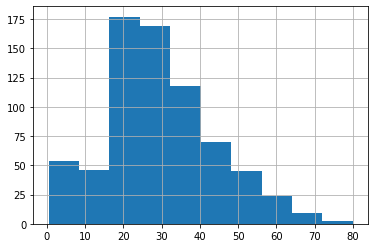

In [274]:
train['Age'].hist()

<AxesSubplot:>

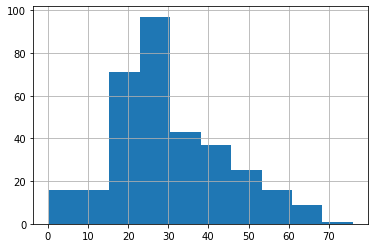

In [275]:
test['Age'].hist()

Following this line of thought I'm gonna replace each NaN entry of the column Age with random numbers from a normal distribution. 

In [276]:
#Mean
mean = train['Age'].mean()
#Standard Deviation
std = train['Age'].std()

In [277]:
#Function to fill missing values with random numbers from a 
#Normal Distribution
def fill_missing_from_Gaussian(column_val):
    if np.isnan(column_val) == True: 
        column_val = int(np.random.normal(mean, std, 1))
    else:
         column_val = int(column_val)
            
    return column_val

In [278]:
train['Age'] = train['Age'].apply(fill_missing_from_Gaussian)

In [279]:
train['Age'].isnull().sum()

0

In [280]:
train['Age'].dtypes

dtype('int64')

<AxesSubplot:>

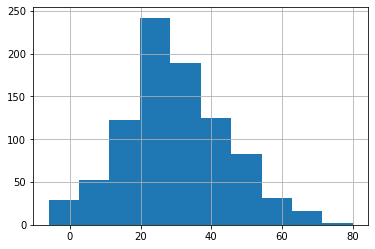

In [281]:
train['Age'].hist()

In [282]:
#Mean
mean = test['Age'].mean()
#Standard Deviation
std = test['Age'].std()

In [283]:
test['Age'] = test['Age'].apply(fill_missing_from_Gaussian)

In [284]:
test['Age'].isnull().sum()

0

In [285]:
test['Age'].dtypes

dtype('int64')

<AxesSubplot:>

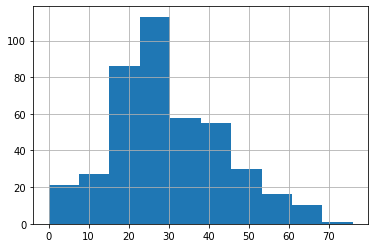

In [286]:
test['Age'].hist()

### Drop useless features

In [287]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Is_Alone', 'Has_Cabin', 'Name_Title'],
      dtype='object')

In [288]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Is_Alone',
       'Has_Cabin', 'Name_Title'],
      dtype='object')

In [289]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [290]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family_Size', 'Is_Alone', 'Has_Cabin', 'Name_Title'],
      dtype='object')

In [291]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Family_Size', 'Is_Alone', 'Has_Cabin', 'Name_Title'],
      dtype='object')

Let's save the cleaned train and test datasets. 

In [292]:
train.to_csv('training_data_clean')
test.to_csv('testing_data_clean')

### Data Preparation

In [293]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Is_Alone,Has_Cabin,Name_Title
0,0,3,male,22,1,0,7.2500,S,2,0,0,Mr
1,1,1,female,38,1,0,71.2833,C,2,0,1,Mrs
2,1,3,female,26,0,0,7.9250,S,1,1,0,Miss
3,1,1,female,35,1,0,53.1000,S,2,0,1,Mrs
4,0,3,male,35,0,0,8.0500,S,1,1,0,Mr


In [294]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Family_Size  891 non-null    int64  
 9   Is_Alone     891 non-null    int64  
 10  Has_Cabin    891 non-null    int64  
 11  Name_Title   891 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [295]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       417 non-null    int64  
 1   Sex          417 non-null    object 
 2   Age          417 non-null    int64  
 3   SibSp        417 non-null    int64  
 4   Parch        417 non-null    int64  
 5   Fare         417 non-null    float64
 6   Embarked     417 non-null    object 
 7   Family_Size  417 non-null    int64  
 8   Is_Alone     417 non-null    int64  
 9   Has_Cabin    417 non-null    int64  
 10  Name_Title   417 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 39.1+ KB


This dataframes have a lot of categorical variables, so one needs to create dummy variables.

Let's get the dummy variables

In [296]:
train = pd.get_dummies(train)

In [297]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Is_Alone,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Rare
0,0,3,22,1,0,7.2500,2,0,0,0,1,0,0,1,0,0,1,0,0
1,1,1,38,1,0,71.2833,2,0,1,1,0,1,0,0,0,0,0,1,0
2,1,3,26,0,0,7.9250,1,1,0,1,0,0,0,1,0,1,0,0,0
3,1,1,35,1,0,53.1000,2,0,1,1,0,0,0,1,0,0,0,1,0
4,0,3,35,0,0,8.0500,1,1,0,0,1,0,0,1,0,0,1,0,0


In [298]:
train.shape

(891, 19)

In [299]:
test = pd.get_dummies(test)

In [300]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Is_Alone,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Rare
0,3,34,0,0,7.8292,1,1,0,0,1,0,1,0,0,0,1,0,0
1,3,47,1,0,7.0000,2,0,0,1,0,0,0,1,0,0,0,1,0
2,2,62,0,0,9.6875,1,1,0,0,1,0,1,0,0,0,1,0,0
3,3,27,0,0,8.6625,1,1,0,0,1,0,0,1,0,0,1,0,0
4,3,22,1,1,12.2875,3,0,0,1,0,0,0,1,0,0,0,1,0


In [301]:
test.shape

(417, 18)

The features `Fare`, `Family_Size`, `SibSp`, `Parch` and `Age` may require some scaling depending on the classifier. 

**Pearson Correlation Heatmap**

Let's generate some correlation plots to see how related one feature is to the next.

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

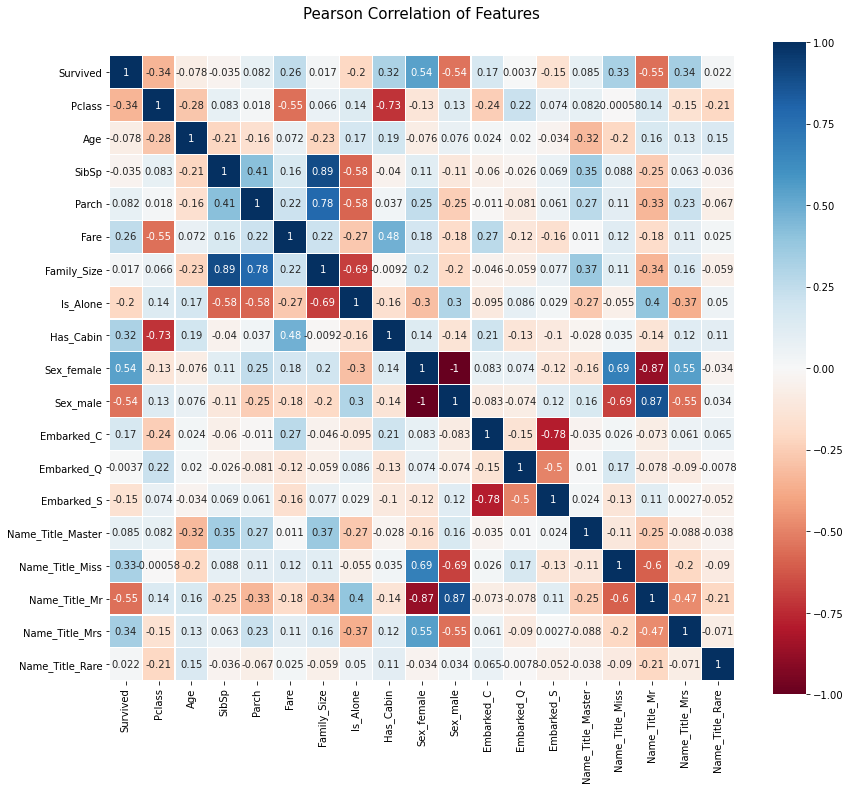

In [302]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into the learning models because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Two relevant correlations are: Having cabin is extremely correlated with travelling in first class and that a higher fare tends to reflect a higher class. 

### Modelling 

The target variable of this problem is categorical, so the goal is to train a classification supervised model in order to predict if new instances survived or not the Titanic shipwreck. I'm not gonna use train-test split for this analysis, since the dataset is already splitted in train set and test set. Although, I'm gonna use cross validation to have a better estimate of the variance of the model and avoid overfitting. 

I'm going to start building and evaluating simpler classification algorithms like Logistic Regression, K-Nearest Neighbors and Decision Trees. After that I'm gonna implement some ensemble algorithms like Voting Classifiers, Gradient Boosting and Random Forest. 

Importing useful libraries

In [406]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #MinMaxScaler is good with low standard 
                                                             #deviations and RobustScaler is good with outliers
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
import itertools

Defining the dependent and independent variables

In [419]:
X_train = train.drop('Survived', axis = 1)

In [420]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Is_Alone,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Rare
0,3,22,1,0,7.2500,2,0,0,0,1,0,0,1,0,0,1,0,0
1,1,38,1,0,71.2833,2,0,1,1,0,1,0,0,0,0,0,1,0
2,3,26,0,0,7.9250,1,1,0,1,0,0,0,1,0,1,0,0,0
3,1,35,1,0,53.1000,2,0,1,1,0,0,0,1,0,0,0,1,0
4,3,35,0,0,8.0500,1,1,0,0,1,0,0,1,0,0,1,0,0


In [421]:
X_train.shape

(891, 18)

In [422]:
X_test = test

In [423]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Is_Alone,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Rare
0,3,34,0,0,7.8292,1,1,0,0,1,0,1,0,0,0,1,0,0
1,3,47,1,0,7.0000,2,0,0,1,0,0,0,1,0,0,0,1,0
2,2,62,0,0,9.6875,1,1,0,0,1,0,1,0,0,0,1,0,0
3,3,27,0,0,8.6625,1,1,0,0,1,0,0,1,0,0,1,0,0
4,3,22,1,1,12.2875,3,0,0,1,0,0,0,1,0,0,0,1,0


In [424]:
y_train = train['Survived'].values

In [425]:
y_train.shape

(891,)

**Performance Measures**

To evaluate the performance of the classifiers I'm gonna look at the confusion matrix. In order to compute the confusion matrix ine first need to have a set of predictions so they can be compared to the actual targets. To get this predictions I'm going to use the cross_val_predict() function. Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. **This means that one gets a clean prediction for each instance in the training set ('clean' meaning that the prediction is made by a model that never saw the data during training**.


**Evaluation Metrics for each classifier:**
- Training F1 score
- Mean Cross Validation F1 Score
- Confusion Matrix 
- ROC/AUC

The confusion matrix is a nice way of estimating what kind of errors our predictor will possibly make. We can define several metrics with the confusion tree:
- Accuracy: (TP+TN) / (TP+TN+FP+FN), basically the diagonal divided by all entries
- True Positive Rate or Recall: TP / (TP+FN). Answer the question, "When the actual value is positive, how often is the prediction correct?"
- Specificity: TN / (TN+FP). Answer the question, "When the actual value is negative, how often is the prediction correct?"
- False Positive Rate: 1 - Specificity or FP / (TN + FP)
- Precision: TP / (TP+FP). Answer the question, "When a positive value is predicted, how often is the prediciton correct?"

The ROC Curve is useful to visualize how sensitivity and specificity are affected by various thesholds, without actually changing the threshold. The lower the threshold, higher the recall and lower the precision. AUC is the are under a ROC Curve. The ideal classifier will have a AUC unitary, since it would have perfect recall with null False Positive Rate. AUC is useful as a single number summary of classifier performance. If one randomly chose one positive and one negative observation, AUC represents the likelihood that the classifier will assign a higher predicted probability to the positive observation. 

In [426]:
def evaluate_classifier(model, X_train, y_train, classes=['Survived=1','Survived=0'], folds=10, normalize=False,
                       title='Confusion Matrix', cmap=plt.cm.Blues):
    print('\n')
    #Calculate the training F1 Score
    print('Training F1 score: ', f1_score(y_train, model.fit(X_train, y_train).predict(X_train)))
    #Calculate the F1 Cross Validation Score
    cross_score = cross_val_score(model, X_train, y_train, cv=folds, scoring='f1')
    print('The mean cross validation f1 score is: ', cross_score.mean())
    print('The standard deviation of the cross validation f1 score is: ', cross_score.std())
    print('\n')
    #Calculate the predictions
    y_pred = cross_val_predict(model, X_train, y_train, cv=folds)
    #Calculate the predictions probabilities
    y_pred_proba = cross_val_predict(model, X_train, y_train, cv=folds, method = 'predict_proba')
    #Evaluate the confusion matrix
    cm = confusion_matrix(y_train, y_pred, labels=[1,0])
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix (without normalization)')
        
    print(cm)
    
    ''' This section of the code plots the confusion matrix'''
    
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    print('\n\n ------Classification Report------\n\n')
    
    print(classification_report(y_train, y_pred))
    
    plt.show()
    
    print('\n----------------------------------------------------\n')
    ''' This section of the code plots the ROC Curve '''
    #Outputs of roc_curve, False Positive Rate, True Positive Rate, Thresholds(from highest to lowest)
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba[:,1]) #Use the predicited probability for class 1
    #Plot the ROC Curve
    plt.plot(fpr, tpr, color = 'blue')
    #Plot division line
    plt.plot([0,1],[0,1], color='black', linestyle='dashed')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate (Recall)')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.grid(True)
    
    #Calculate the area under the curve (AUC)
    auc = roc_auc_score(y_train, y_pred_proba[:,1]) #Use the predicited probability for class 1 
    print('The area under the curve (AUC) is: ', auc)

Function to evaluate the True Positive Rate and False Positive Rate associated with a specific threshold

In [559]:
''' This function evaluates the True Positive Rate and the False Positive Rate for a specific threshold'''
def evaluate_threshold(tpr, fpr, thresholds, threshold):
    true_pos_rate = tpr[thresholds > threshold][-1]
    false_pos_rate = fpr[thresholds > threshold][-1]
    print('True Positive Rate: ', true_pos_rate) #The thresholds are in descending order
    print('False Positive Rate: ', false_pos_rate)
    
    return false_pos_rate, true_pos_rate


---

- Logistic Regression

In [742]:
train.head()

,Survived,Age,SibSp,Parch,Fare,Family_Size,Is_Alone,Has_Cabin,Pclass_1,Pclass_2,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Rare
0,0,22,1,0,7.2500,2,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,38,1,0,71.2833,2,0,1,1,0,...,1,0,1,0,0,0,0,0,1,0
2,1,26,0,0,7.9250,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,1,35,1,0,53.1000,2,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0,35,0,0,8.0500,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [428]:
logreg = LogisticRegression()
scores = []

for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
    column_trans = make_column_transformer(
                               (scaler, ['Fare', 'Family_Size', 'Age', 'SibSp','Parch']), remainder='passthrough')
    
    #Pipeline
    pipe_lg = make_pipeline(column_trans, logreg)
    y_pred = cross_val_predict(pipe_lg, X_train, y_train, cv=10)
    scores.append(f1_score(y_train, y_pred))

In [429]:
scores

[0.7671641791044775, 0.7754491017964072, 0.7671641791044775]

Seems like the MinMaxScaler performs the best.

In [430]:
column_trans = make_column_transformer(
                               (MinMaxScaler(), ['Fare', 'Family_Size', 'Age', 'SibSp','Parch']), remainder='passthrough')
    
#Pipeline
pipe_lg = make_pipeline(column_trans, logreg)



Training F1 score:  0.7904191616766467
The mean cross validation f1 score is:  0.7722984733809525
The standard deviation of the cross validation f1 score is:  0.05501745371487101


Confusion Matrix (without normalization)
[[259  83]
 [ 67 482]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.85      0.88      0.87       549
           1       0.79      0.76      0.78       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



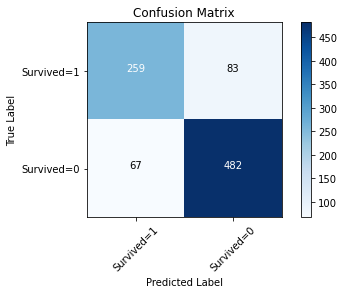


----------------------------------------------------

The area under the curve (AUC) is:  0.8671348224842617


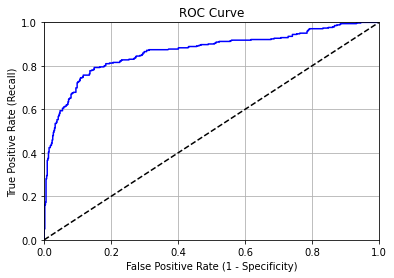

In [431]:
evaluate_classifier(pipe_lg, X_train, y_train)

Regularization

The hyperparameter controlling the regularization strength of a LogisticRegression model is C. The higher the value of C, the less the model is regularized. 

In [446]:
#Hyperparameters
C = range(1,20)
#List of F1 scores
scores = []

for c in C:
    #Instantiate the Logistic Regressor
    logreg = LogisticRegression(C = c, max_iter=200)
    #Create the pipeline
    pipe_lg = make_pipeline(column_trans, logreg)
    #Calculate the predictions
    y_pred_proba = cross_val_predict(pipe_lg, X_train, y_train, cv=10, method = 'predict_proba')
    #Calculate the F1 score
    score = roc_auc_score(y_train, y_pred_proba[:,1])
    scores.append(score)
    

In [447]:
scores

[0.8671348224842617,
 0.8671028664557568,
 0.8667460241374535,
 0.866341247776393,
 0.8661228815816104,
 0.8659417974200833,
 0.8657713652680579,
 0.8656435411540386,
 0.8655796290970292,
 0.8654091969450037,
 0.8652600688119814,
 0.8651269186932113,
 0.8651215926884607,
 0.8650470286219495,
 0.864956486541186,
 0.8649032264936781,
 0.8648446404414193,
 0.8647913803939111,
 0.8647700763749082]

Text(0, 0.5, 'AUC')

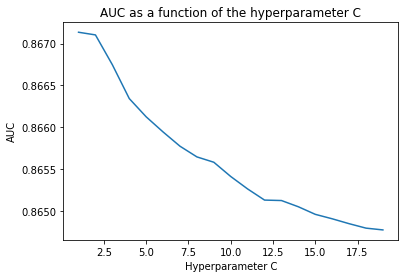

In [448]:
plt.plot(C, scores)
plt.title('AUC as a function of the hyperparameter C')
plt.xlabel('Hyperparameter C')
plt.ylabel('AUC')

Let's analyse lower values of C.

In [450]:
#Hyperparameters
C = np.arange(0.5,3, 0.1)
#List of F1 scores
scores = []

for c in C:
    #Instantiate the Logistic Regressor
    logreg = LogisticRegression(C = c, max_iter=200)
    #Create the pipeline
    pipe_lg = make_pipeline(column_trans, logreg)
    #Calculate the predictions
    y_pred_proba = cross_val_predict(pipe_lg, X_train, y_train, cv=10, method='predict_proba')
    #Calculate the F1 score
    score = roc_auc_score(y_train, y_pred_proba[:,1])
    scores.append(score)

In [451]:
scores

[0.8657394092395532,
 0.8661015775626072,
 0.8666075480139328,
 0.8668525442324694,
 0.8670975404510061,
 0.8671348224842617,
 0.8672040605460222,
 0.8671774305222681,
 0.8672040605460221,
 0.8672147125555235,
 0.8671987345412713,
 0.8671454744937632,
 0.8671294964795109,
 0.8672040605460221,
 0.867177430522268,
 0.8671028664557568,
 0.8670922144462553,
 0.8670069983702426,
 0.8670762364320028,
 0.867022976384495,
 0.8668951522704759,
 0.8668312402134661,
 0.8668259142087154,
 0.8668205882039647,
 0.8668046101897122]

Text(0, 0.5, 'AUC')

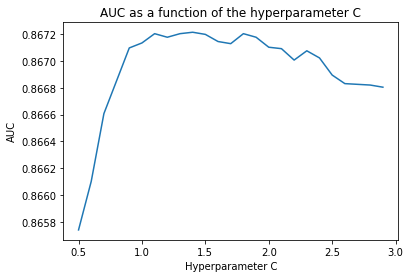

In [452]:
plt.plot(C, scores)
plt.title('AUC as a function of the hyperparameter C')
plt.xlabel('Hyperparameter C')
plt.ylabel('AUC')

We have a maximum AUC when C = 1.5. 

**---> Best Logistic Regression <---**

In [453]:
logreg = LogisticRegression(C=1.5, max_iter=200)
column_trans = make_column_transformer(
                        (MinMaxScaler(), ['Fare', 'Family_Size', 'Age', 'SibSp','Parch']), remainder='passthrough')
pipe_lg = make_pipeline(column_trans, logreg)



Training F1 score:  0.7886056971514241
The mean cross validation f1 score is:  0.7731209347667942
The standard deviation of the cross validation f1 score is:  0.05722621230813914


Confusion Matrix (without normalization)
[[260  82]
 [ 68 481]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.85      0.88      0.87       549
           1       0.79      0.76      0.78       342

    accuracy                           0.83       891
   macro avg       0.82      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



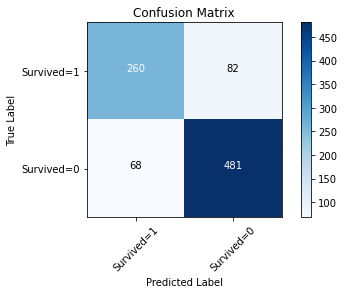


----------------------------------------------------

The area under the curve (AUC) is:  0.8671987345412713


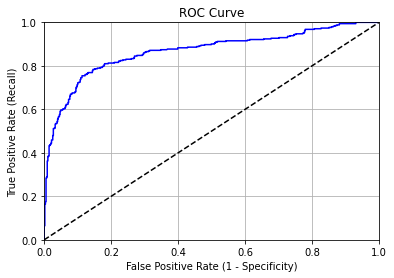

In [454]:
evaluate_classifier(pipe_lg, X_train, y_train)

The model improved slightly with regularization.

The biggest drawback of this model performace is that it has a low recall for the positive target. One can try to increase this value **reducing the threshold slightly**, which will reduce precision too, but overall the resulting model can be better.

We can use method='predict_proba' in the cross_val_predict and this way we can tweak the predictions changing the threshold.

In [756]:
y_pred_proba = cross_val_predict(pipe_lg, X_train, y_train, cv=10, method='predict_proba')

In [757]:
y_pred_proba

array([[0.91632213, 0.08367787],
       [0.02587505, 0.97412495],
       [0.41447696, 0.58552304],
       ...,
       [0.51500716, 0.48499284],
       [0.46098161, 0.53901839],
       [0.91387327, 0.08612673]])

The second column is the probability of Survived = 1 for each intance. 

And one can get the predicitons for different thresholds in this fashion,

In [758]:
threshold = 0.4

y_pred = (y_pred_proba[:,1] >= threshold).astype('int')
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

Let's create a function that evaluates a model based on a threshold.

In [589]:
def threshold_evaluation(model, X_train, y_train, threshold, classes=['Survived=1','Survived=0'], 
                                folds=10, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    print('\n Evaluation with a threshold of {} \n'.format(threshold))
    #Calculate the probabilities of the predictions
    y_pred_proba = cross_val_predict(model, X_train, y_train, cv=folds, method='predict_proba')

    #Final predictions with the threshold
    y_pred = (y_pred_proba[:,1] >= threshold).astype('int')

    #Evaluate the confusion matrix
    cm = confusion_matrix(y_train, y_pred, labels=[1,0])
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix (without normalization)')
        
    print(cm)

    
    ''' This section of the code plots the confusion matrix'''

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    print('\n\n ------Classification Report------\n\n')
    
    print(classification_report(y_train, y_pred))

   

---

- K-Nearest Neighbors

In [458]:
KNN = KNeighborsClassifier()
scores = []

for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
    column_trans = make_column_transformer(
                               (scaler, ['Fare', 'Family_Size', 'Age', 'SibSp','Parch']), remainder='passthrough')
    
    #Pipeline
    pipe_KNN = make_pipeline(column_trans, KNN)
    y_pred = cross_val_predict(pipe_KNN, X_train, y_train, cv=10)
    scores.append(f1_score(y_train, y_pred))

In [459]:
scores

[0.7394695787831513, 0.7267080745341615, 0.7359050445103857]

The Robust Scaler performed the best. 

In [460]:
KNN = KNeighborsClassifier()
column_trans = make_column_transformer(
                               (RobustScaler(), ['Fare', 'Family_Size', 'Age', 'SibSp','Parch']), remainder='passthrough')

In [461]:
#Pipeline
pipe_KNN = make_pipeline(column_trans, KNN)



Training F1 score:  0.8107302533532041
The mean cross validation f1 score is:  0.7335582826627932
The standard deviation of the cross validation f1 score is:  0.07087677983066742


Confusion Matrix (without normalization)
[[248  94]
 [ 84 465]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.75      0.73      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



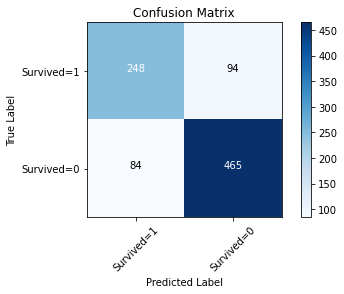


----------------------------------------------------

The area under the curve (AUC) is:  0.8483100586925724


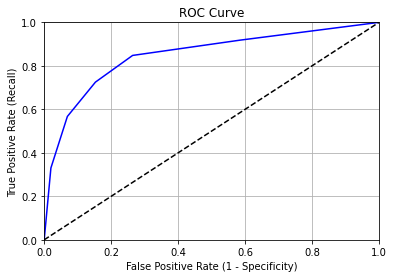

In [462]:
evaluate_classifier(pipe_KNN, X_train, y_train)

The KNN model without tuning performs worse than the logistic regressor, regarding both precision and recall for the positive and negative targets.

Tuning

In [463]:
#Number of neighbors
n_neighbors = range(2,30,1)
#List of F1 scores
scores = []

for n in n_neighbors:
    #Instantiate the K-Neighbors Classifier
    KNN = KNeighborsClassifier(n_neighbors=n)
    #Create the pipeline
    pipe_KNN = make_pipeline(column_trans, KNN)
    #Calculate the predictions
    y_pred = cross_val_predict(pipe_KNN, X_train, y_train, cv=10)
    #Calculate the F1 score
    score = f1_score(y_train, y_pred)
    scores.append(score)
    

In [464]:
scores

[0.6563039723661486,
 0.744807121661721,
 0.713128038897893,
 0.7359050445103857,
 0.7206349206349207,
 0.7355982274741507,
 0.7246835443037976,
 0.7427701674277016,
 0.7203791469194312,
 0.7484848484848485,
 0.7378335949764521,
 0.756838905775076,
 0.7515527950310559,
 0.7616191904047975,
 0.7472868217054265,
 0.7522388059701494,
 0.7386541471048513,
 0.7416413373860182,
 0.7383177570093459,
 0.7345679012345678,
 0.7350157728706626,
 0.7426810477657936,
 0.7386541471048513,
 0.7426810477657936,
 0.7363494539781591,
 0.7484848484848485,
 0.736517719568567,
 0.7458646616541353]

Text(0, 0.5, 'F1 Score')

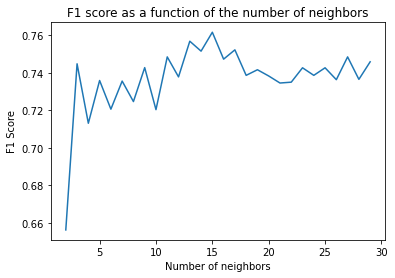

In [465]:
plt.plot(n_neighbors, scores)
plt.title('F1 score as a function of the number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('F1 Score')

The best number of neighbors tend to stabilize around 20 and 25.

**---> Best K-Nearest Neighbors <---**



Training F1 score:  0.763239875389408
The mean cross validation f1 score is:  0.7357346622316424
The standard deviation of the cross validation f1 score is:  0.0527130285639933


Confusion Matrix (without normalization)
[[237 105]
 [ 63 486]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       549
           1       0.79      0.69      0.74       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



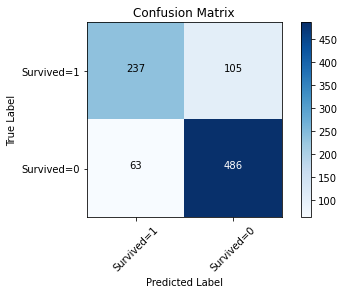


----------------------------------------------------

The area under the curve (AUC) is:  0.8506588267876736


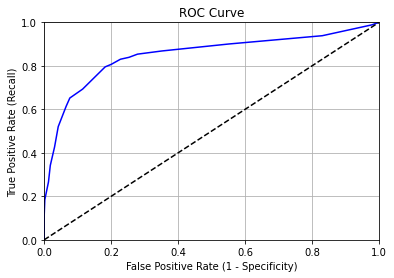

In [466]:
KNN = KNeighborsClassifier(n_neighbors=20)
column_trans = make_column_transformer(
                        (RobustScaler(), ['Fare', 'Family_Size', 'Age', 'SibSp','Parch']), remainder='passthrough')
pipe_KNN = make_pipeline(column_trans, KNN)
evaluate_classifier(pipe_KNN, X_train, y_train)

The tuned KNN classifier performs similarly to the regularized Logistic Regressor regarding the negative instances, but it performs poorly regarding the positive targets. In conclusion, the regularized Logistic Regressor Classifier performs better than the tuned KNN classifier.

---

- Decision Tree

In [468]:
decision_tree = DecisionTreeClassifier()

One of the many qualites of Decision Trees is that they require very little data preparation. In particular, they don't require feature scaling or centering at all.



Training F1 score:  0.9896602658788775
The mean cross validation f1 score is:  0.7362321191499573
The standard deviation of the cross validation f1 score is:  0.043489405883871075


Confusion Matrix (without normalization)
[[255  87]
 [ 95 454]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.84      0.83      0.83       549
           1       0.73      0.75      0.74       342

    accuracy                           0.80       891
   macro avg       0.78      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



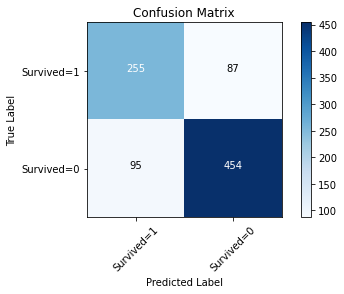


----------------------------------------------------

The area under the curve (AUC) is:  0.7715330372074691


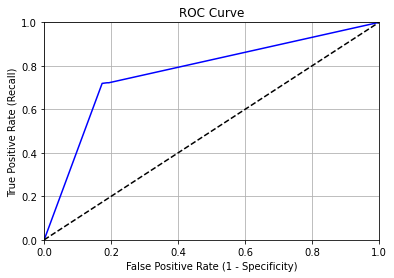

In [469]:
evaluate_classifier(decision_tree, X_train, y_train)

The decision tree without tuning performs worse than the regularized Logistic Regression Classifier, both regarding the negative and positive targets.

In [779]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [780]:
f1_score(y_train, decision_tree.predict(X_train))

0.9821428571428572

The decision tree has a training f1_score close to unit. This result follows the tendency that a non-tuned decision tree has the tendency to overfit, which is happening in this case. Decision trees make very few assumptions about the training data. If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it. To avoid overfitting the data, one needs to restrict the Decision Tree freedom during training. The first hyperparameter that I'm gonna regularize is the max_depth, which deals witht the maximum depth of the decision tree. 

In [472]:
#Maximum depth
max_depths = range(1,30,1)
#List of F1 scores
scores = []

for max_depth in max_depths:
    #Instantiate the Decision Tree Classifier
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)
    #Calculate the predictions
    y_pred_proba = cross_val_predict(decision_tree, X_train, y_train, cv=10, method = 'predict_proba')
    #Calculate the F1 score
    score = roc_auc_score(y_train, y_pred_proba[:,1])
    scores.append(score)

In [473]:
scores

[0.7520185558005518,
 0.8232538693424514,
 0.8390108543976821,
 0.8451144558420947,
 0.842581940583091,
 0.8328539929057617,
 0.8331682271860585,
 0.8200769075086014,
 0.7989859286954484,
 0.7931779205147051,
 0.8010124735031263,
 0.7869118759253932,
 0.7837508921057956,
 0.7793303081626347,
 0.7821637426900584,
 0.7830531854834415,
 0.7811917468230382,
 0.7810612597066436,
 0.787116927108299,
 0.775679331905964,
 0.7856283087804514,
 0.7836976320582878,
 0.7794687842861556,
 0.7846110418730493,
 0.7788935757730696,
 0.7777404957445222,
 0.776829748932136,
 0.7759163391173745,
 0.7825472150321159]

Text(0, 0.5, 'AUC')

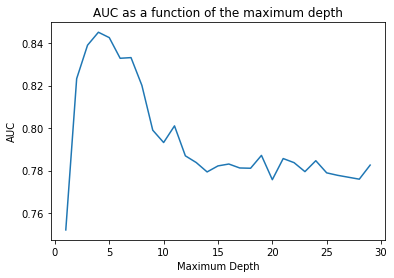

In [475]:
plt.plot(max_depths, scores)
plt.title('AUC as a function of the maximum depth')
plt.xlabel('Maximum Depth')
plt.ylabel('AUC')

Seems like a max_depth around 5 is a nice guess.

In [478]:
#Maximum depth
max_depths = range(2,7,1)
#List of F1 scores
scores = []

for max_depth in max_depths:
    #Instantiate the Decision Tree Classifier
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)
    #Calculate the predictions
    y_pred_proba = cross_val_predict(decision_tree, X_train, y_train, cv=10, method = 'predict_proba')
    #Calculate the F1 score
    score = roc_auc_score(y_train, y_pred_proba[:,1])
    scores.append(score)

Text(0, 0.5, 'AUC')

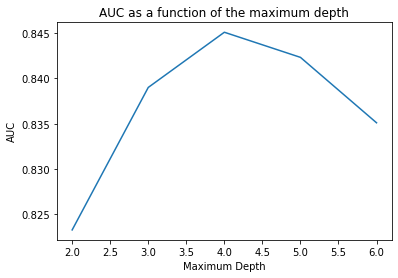

In [479]:
plt.plot(max_depths, scores)
plt.title('AUC as a function of the maximum depth')
plt.xlabel('Maximum Depth')
plt.ylabel('AUC')

The maximum AUC occurs when max_depth = 4.

**---> Best Decision Tree <---**

In [480]:
decision_tree = DecisionTreeClassifier(max_depth=4)



Training F1 score:  0.7928994082840237
The mean cross validation f1 score is:  0.7696861415433157
The standard deviation of the cross validation f1 score is:  0.05149677124319414


Confusion Matrix (without normalization)
[[264  78]
 [ 80 469]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.86      0.85      0.86       549
           1       0.77      0.77      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



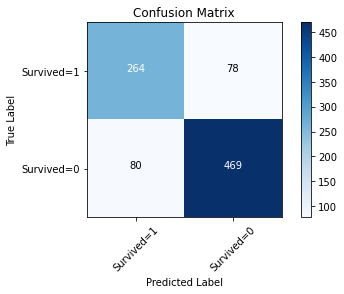


----------------------------------------------------

The area under the curve (AUC) is:  0.8486722270156266


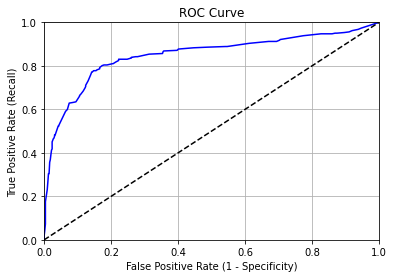

In [481]:
evaluate_classifier(decision_tree, X_train, y_train)

The regularized model performs better than the non regularized decision tree. The training F1 score also reduced substantially, which is an indication that the decision tree is no longer overfitiing. However, it still performs worse overall than the regularized Logistic Regression Classifier.

Let's try to regularize more than one hyperparameter at once using GridSearchCV.

In [489]:
#Dictionary with the hyperparameters
parameters = {'max_depth':range(2,8,1), 'min_samples_leaf':range(10,200,10)}
decision_tree = DecisionTreeClassifier()
gs = GridSearchCV(decision_tree, parameters, cv=10, scoring='roc_auc', n_jobs = -1)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 8),
                         'min_samples_leaf': range(10, 200, 10)},
             scoring='roc_auc')

In [490]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007396,0.002374,0.005297,0.001004,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.819221,0.841979,0.74492,0.859893,0.832888,0.816043,0.815508,0.835561,0.886898,0.836243,0.828915,0.034786,87
1,0.005897,0.000538,0.004997,0.000001,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.819221,0.841979,0.74492,0.859893,0.832888,0.816043,0.815508,0.835561,0.886898,0.836243,0.828915,0.034786,87
2,0.005597,0.001199,0.004897,0.000300,2,30,"{'max_depth': 2, 'min_samples_leaf': 30}",0.819221,0.841979,0.74492,0.859893,0.832888,0.816043,0.815508,0.835561,0.886898,0.836243,0.828915,0.034786,87
3,0.004997,0.000447,0.005497,0.001283,2,40,"{'max_depth': 2, 'min_samples_leaf': 40}",0.819221,0.841979,0.74492,0.859893,0.832888,0.816043,0.815508,0.835561,0.886898,0.836243,0.828915,0.034786,87
4,0.005796,0.000600,0.005997,0.001843,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.819221,0.841979,0.74492,0.899198,0.859358,0.831818,0.824064,0.835561,0.893850,0.836243,0.838621,0.040732,73


In [491]:
max_depths = []
min_samples = []
scores = []
for hyperparameters,score in zip(results['params'],results['mean_test_score']):
    max_depth = hyperparameters['max_depth']
    min_sample = hyperparameters['min_samples_leaf']
    max_depths.append(max_depth)
    min_samples.append(min_sample)
    scores.append(score)
    

Text(0, 0.5, 'min_samples_leaf')

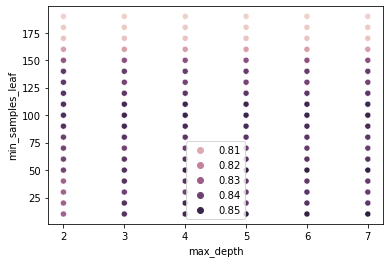

In [492]:
sns.scatterplot(x=max_depths, y=min_samples, hue=scores)
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')

In [493]:
#Best parameters
gs.best_params_

{'max_depth': 7, 'min_samples_leaf': 10}

In [494]:
decision_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)



Training F1 score:  0.7975646879756468
The mean cross validation f1 score is:  0.7425876979463862
The standard deviation of the cross validation f1 score is:  0.06206074366675889


Confusion Matrix (without normalization)
[[242 100]
 [ 65 484]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       549
           1       0.79      0.71      0.75       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



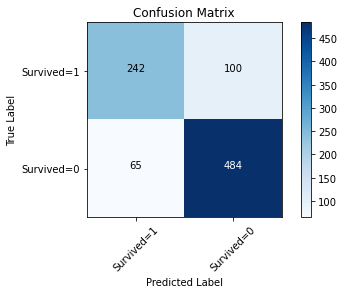


----------------------------------------------------

The area under the curve (AUC) is:  0.8458148254668244


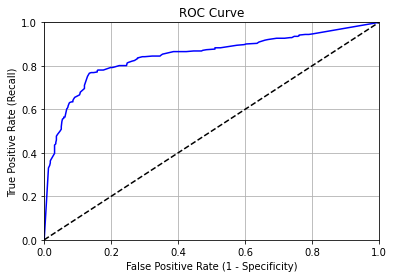

In [495]:
evaluate_classifier(decision_tree, X_train, y_train)

The model with only max_depth regularized performed better overall than the model with two hyperparameters regularized.

Generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training data. Random Forests can limit this instability by averaging predictions over many trees. Let's see how Random Forests perform in this dataset.

---

- Random Forest

A Random Forest is an ensemble of Decision Trees. Despite it's simplicity this is one of the most powerful Machine Learning algorithms available today. 

In [496]:
random_forest = RandomForestClassifier()



Training F1 score:  0.9896602658788775
The mean cross validation f1 score is:  0.7501122603417677
The standard deviation of the cross validation f1 score is:  0.07371487988423873


Confusion Matrix (without normalization)
[[251  91]
 [ 71 478]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       549
           1       0.78      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



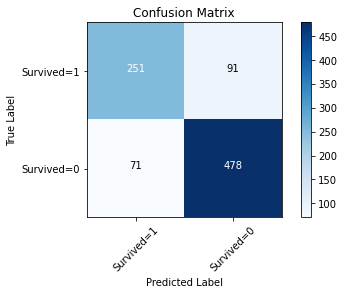


----------------------------------------------------

The area under the curve (AUC) is:  0.858956742189414


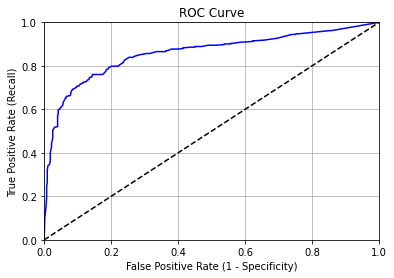

In [497]:
evaluate_classifier(random_forest, X_train, y_train)

Without any tuning the Random Forest Classifier already performs considerably well. Although it seems to be overfitting the model, since the training f1 score is really high. 

Tuning

Let's start tuning the number of trees which is reflected in the hyperparameter n_estimators.

In [498]:
#Number of trees
n_estimators = range(50,1000,100)
#List of F1 scores
scores = []

for n in n_estimators:
    #Instantiate the Random Forest Classifier
    random_forest = RandomForestClassifier(n_estimators=n)
    #Calculate the predictions
    y_pred_proba = cross_val_predict(random_forest, X_train, y_train, cv=10, method = 'predict_proba', n_jobs=-1)
    #Calculate the F1 score
    score = roc_auc_score(y_train, y_pred_proba[:,1])
    scores.append(score)

In [499]:
scores

[0.8561046666453627,
 0.8576065999850871,
 0.8566985161750763,
 0.86013378923934,
 0.8582111015243026,
 0.8572284536477807,
 0.8590819033010578,
 0.8578515962036237,
 0.8587623430160101,
 0.8579048562511319]

Text(0, 0.5, 'AUC')

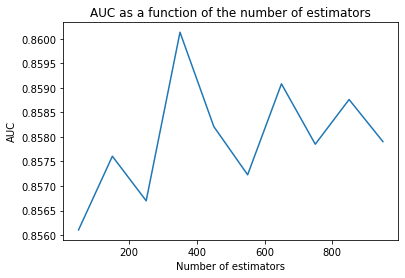

In [500]:
plt.plot(n_estimators, scores)
plt.title('AUC as a function of the number of estimators')
plt.xlabel('Number of estimators')
plt.ylabel('AUC')

The AUC score vary a lot with number of estimators higher than 400.

**Tuning steps:**

I'm gonna start with a Randomized Search followed by a fine tuning using GridSearchCV.
- the split criteria: can lead to different forests, and as there is only two possible values, **gini** or **entropy**. I'm gonna try them both. The hyperparameter that control the split criteria is **criterion**
- number of estimators: controlled by the hyperparameter **n_estimators**. 
- maximum depth of each tree: controlled by the hyperparameter **max_depth**. Increasing the Depth of individual trees increases the possible number of feature/value combinations that are taken into account. The deeper the tree, the more splits it has and the more information about the data it takes into account. In an individual tree this causes overfitting, however in Random Forest, because of the way the ensemble is built, it is harder to overfit, although it is still possible for large depth values. This parameter should be set to a reasonable amount depending on the number of features of your tree.
- number of random features to consider at each split: controlled by the hyerparameter **max_features**. This is one of the most important hyperparameters to tune in the Random Forest ensemble. The best value of this hyperparameter is hard to pick without experimentation, so the best way to obtain it is using a Grid Search. 

One can try setting the following values in the grid search space for the RandomForestClassifier hyperparameter **max_features**:
- **None**: This will consider all the features of the data, taking some of the randomness out of random forests, and possibly increasing variance.
- **sqrt** : This option will take square root of the total number of features in individual each split. 
- **float number** : If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split. I'm gonna try 0.3, 0.4, 0.5 and 0.6.
- **log2**: then max_features=log2(n_features)

In [504]:
#Dictionary with the hyperparameters
parameters = {'max_depth':range(4,50,2), 'n_estimators':range(100,1000,100), 'max_features':(None, 'sqrt',
                                0.3,0.4,0.5,0.6, 'log2')}
random_forest = RandomForestClassifier()
gs = RandomizedSearchCV(random_forest, parameters, cv=10, scoring='roc_auc', n_jobs=-1, n_iter=20)
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(4, 50, 2),
                                        'max_features': (None, 'sqrt', 0.3, 0.4,
                                                         0.5, 0.6, 'log2'),
                                        'n_estimators': range(100, 1000, 100)},
                   scoring='roc_auc')

In [505]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.060886,0.065010,0.056867,0.004180,300,0.4,46,"{'n_estimators': 300, 'max_features': 0.4, 'ma...",0.808052,0.886364,...,0.909358,0.918182,0.868717,0.828877,0.847326,0.931551,0.906878,0.861413,0.063696,15
1,1.768080,0.150667,0.087050,0.002507,500,0.4,48,"{'n_estimators': 500, 'max_features': 0.4, 'ma...",0.803896,0.886096,...,0.905615,0.914439,0.868717,0.837166,0.845187,0.934492,0.907407,0.862013,0.061533,11
2,3.348469,0.190099,0.157109,0.009749,900,0.6,46,"{'n_estimators': 900, 'max_features': 0.6, 'ma...",0.801818,0.887433,...,0.901604,0.916043,0.865508,0.839572,0.848396,0.934225,0.902910,0.861088,0.061993,16
3,0.698297,0.009721,0.039078,0.005661,200,0.6,34,"{'n_estimators': 200, 'max_features': 0.6, 'ma...",0.794805,0.896524,...,0.898128,0.919251,0.868182,0.824866,0.837166,0.935561,0.903704,0.859049,0.064651,18
4,3.018759,0.051741,0.158109,0.005755,900,0.4,34,"{'n_estimators': 900, 'max_features': 0.4, 'ma...",0.804416,0.888770,...,0.907219,0.913636,0.870588,0.841176,0.840909,0.929412,0.905291,0.861906,0.060788,12


In [506]:
gs.best_score_

0.8718033839798547

In [507]:
#Best parameters
gs.best_params_

{'n_estimators': 400, 'max_features': 0.4, 'max_depth': 6}

Now let's perform a fine tuning around this hyperparameters values.

In [508]:
#Dictionary with the hyperparameters
parameters = {'max_depth':range(5,8,1), 'n_estimators':range(400,700,100), 'max_features':(0.6,0.5,'log2'),
              'criterion':('gini','entropy')}
random_forest = RandomForestClassifier()
gs = GridSearchCV(random_forest, parameters, cv=10, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(5, 8),
                         'max_features': (0.6, 0.5, 'log2'),
                         'n_estimators': range(400, 700, 100)},
             scoring='roc_auc')

In [509]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.439470,0.271074,0.069660,0.004731,gini,5,0.6,400,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.829610,...,0.912834,0.902674,0.867914,0.869519,0.872727,0.951872,0.900529,0.870848,0.062791,46
1,1.617167,0.132355,0.091647,0.011613,gini,5,0.6,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.831688,...,0.915508,0.900535,0.870588,0.871123,0.868449,0.949198,0.900000,0.871752,0.059375,35
2,1.924087,0.142055,0.098303,0.002863,gini,5,0.6,600,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.828571,...,0.913904,0.903743,0.872193,0.874866,0.870588,0.948663,0.900000,0.871868,0.060838,32
3,1.207727,0.035721,0.067861,0.001445,gini,5,0.5,400,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.832208,...,0.911765,0.901604,0.874866,0.870588,0.870588,0.946524,0.898942,0.871912,0.059275,30
4,1.519424,0.027618,0.084751,0.004465,gini,5,0.5,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.828052,...,0.910160,0.901070,0.876471,0.870053,0.874866,0.947594,0.898942,0.871496,0.061033,40


In [510]:
gs.best_score_

0.8745731545143309

In [511]:
#Best parameters
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 0.6,
 'n_estimators': 400}

**---> Best Random Forest <---**

In [512]:
random_forest=RandomForestClassifier(max_depth=6, max_features=0.6, n_estimators=400, criterion='entropy')



Training F1 score:  0.841614906832298
The mean cross validation f1 score is:  0.7641870387816294
The standard deviation of the cross validation f1 score is:  0.0829569022446287


Confusion Matrix (without normalization)
[[247  95]
 [ 57 492]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.81      0.72      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



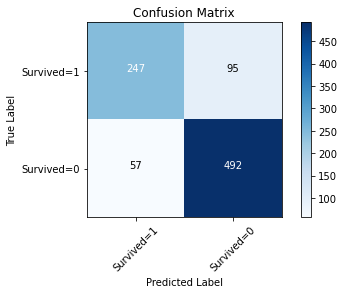


----------------------------------------------------

The area under the curve (AUC) is:  0.8658246253155658


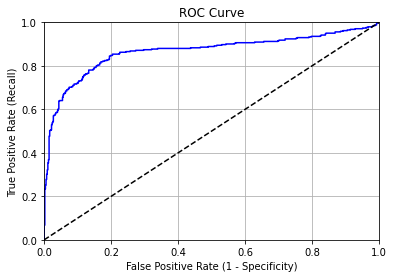

In [513]:
evaluate_classifier(random_forest, X_train, y_train)

This model performs significantly better than the previously analysed random forest. The Training F1 score reduced substantially, although still quite high. This Random Forest Classifier is one of the best model evaluated so far, performing really similarly to the Logistic Regressor. 

Analysing feature importance

If one looks at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature's importance by computing the average depth at which it appears across all trees in the forest. Scikit-learn computes this automatically for every feature after training. 

In [514]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.6,
                       n_estimators=400)

In [515]:
names = []
scores=[]
for name, score in zip(train.columns[1:], random_forest.feature_importances_):
    names.append(name)
    scores.append(score)

pd.DataFrame({'Predictors':names, 'Feature Importance Score':scores}).sort_values('Feature Importance Score', ascending=False)
    

,Predictors,Feature Importance Score
15,Name_Title_Mr,0.188308
4,Fare,0.143106
8,Sex_female,0.124565
1,Age,0.108603
0,Pclass,0.107893
9,Sex_male,0.105283
5,Family_Size,0.069943
7,Has_Cabin,0.039513
2,SibSp,0.024953
13,Name_Title_Master,0.021372


---

- Voting Classifier

Now I'm gonna ensemble the best models evaluated seeking for a best classifier overall. If all models are able to estimate class probabilities, then one can tell Scikit-Learn to predict the class with the highest class probability, average over all the individual classifiers. This is called soft voting. 

Best Classifiers by now, excluding the K-Nearest Neighbors

In [557]:
#Best Logistic Regression Classifier
logreg = LogisticRegression(C=1.5, max_iter=200)
column_trans = make_column_transformer(
                        (MinMaxScaler(), ['Fare', 'Family_Size', 'Age', 'SibSp','Parch']), remainder='passthrough')
pipe_lg = make_pipeline(column_trans, logreg)

#Best Decision Tree Classifier
decision_tree = DecisionTreeClassifier(max_depth=4)

#Best Random Forest Classifier
random_forest=RandomForestClassifier(max_depth=6, max_features=0.6, n_estimators=400, criterion='entropy')


In [520]:
voting_clf = VotingClassifier(
                  estimators=[('lr', pipe_lg), ('dt', decision_tree), ('rf', random_forest)],
                  voting = 'soft')



Training F1 score:  0.804185351270553
The mean cross validation f1 score is:  0.76691511233094
The standard deviation of the cross validation f1 score is:  0.06136215580183401


Confusion Matrix (without normalization)
[[258  84]
 [ 69 480]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.79      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



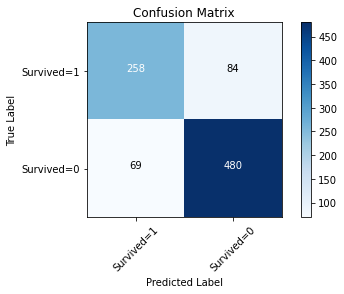


----------------------------------------------------

The area under the curve (AUC) is:  0.8643067139615889


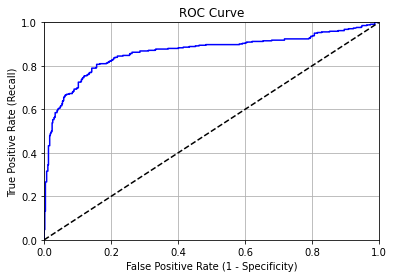

In [521]:
evaluate_classifier(voting_clf, X_train, y_train)

The Logistic Regressor Classifier and the Random Forest alone performed better. 

In [522]:
voting_clf = VotingClassifier(
                  estimators=[('lr', pipe_lg), ('rf', random_forest)],
                  voting = 'soft')



Training F1 score:  0.811377245508982
The mean cross validation f1 score is:  0.7735976265843744
The standard deviation of the cross validation f1 score is:  0.07019409093113203


Confusion Matrix (without normalization)
[[257  85]
 [ 62 487]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.81      0.75      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.83      0.84      0.83       891



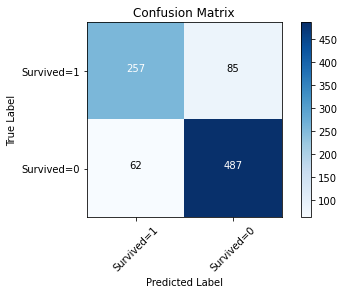


----------------------------------------------------

The area under the curve (AUC) is:  0.8715554064274225


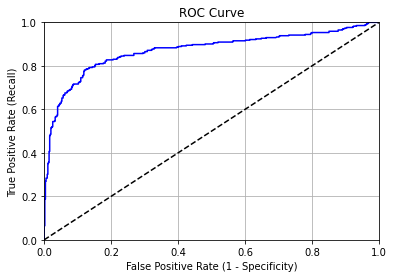

In [523]:
evaluate_classifier(voting_clf, X_train, y_train)

The voting classifier including the logistic regression and the random forest is the best model by now.

--- 

**AdaBoosting**:

Boosting refers to any ensemble method that can combine several weak learns into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. 

- ADA

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. Once all predictors are trained, the ensemble makes predictions very much like bagging or pasting, except that predictors have different weights depending on their overall accuracy on the weighted training set. 

I'm gonna use the decision tree in the Adaboost Classifier.

In [524]:
ada_clf = AdaBoostClassifier(
             decision_tree, algorithm='SAMME.R', learning_rate=0.1)



Training F1 score:  0.942942942942943
The mean cross validation f1 score is:  0.7329092306855907
The standard deviation of the cross validation f1 score is:  0.08638725022439978


Confusion Matrix (without normalization)
[[248  94]
 [ 80 469]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.76      0.73      0.74       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



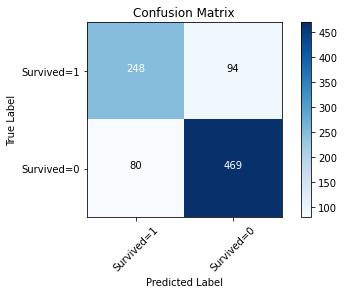


----------------------------------------------------

The area under the curve (AUC) is:  0.8352746620649985


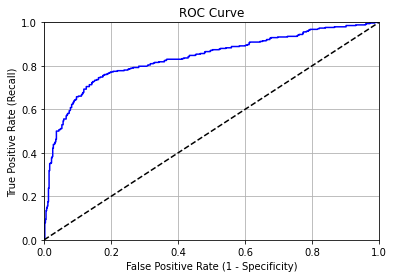

In [525]:
evaluate_classifier(ada_clf, X_train, y_train)

Let's tune the ADA starting with a randomized search.

In [536]:
#Dictionary with the hyperparameters
parameters = {'n_estimators':range(2,20,2), 'learning_rate':np.arange(0.1,1,0.1)}
ada_clf = AdaBoostClassifier()
gs = RandomizedSearchCV(ada_clf, parameters, cv=10, scoring='roc_auc', n_jobs=-1, n_iter=30)
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'n_estimators': range(2, 20, 2)},
                   scoring='roc_auc')

In [537]:
gs.best_score_

0.8722590046119458

In [538]:
gs.best_params_

{'n_estimators': 18, 'learning_rate': 0.6}

Fine Tuning

In [539]:
#Dictionary with the hyperparameters
parameters = {'n_estimators':range(17,20,1), 'learning_rate':np.arange(0.5,0.8,0.1)}
ada_clf = AdaBoostClassifier()
gs = GridSearchCV(ada_clf, parameters, cv=10, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.5, 0.6, 0.7, 0.8]),
                         'n_estimators': range(17, 20)},
             scoring='roc_auc')

In [540]:
gs.best_score_

0.8731600316894434

In [541]:
gs.best_params_

{'learning_rate': 0.6, 'n_estimators': 17}



Training F1 score:  0.7864506627393225
The mean cross validation f1 score is:  0.7645123620668173
The standard deviation of the cross validation f1 score is:  0.04437510447542818


Confusion Matrix (without normalization)
[[258  84]
 [ 73 476]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.78      0.75      0.77       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



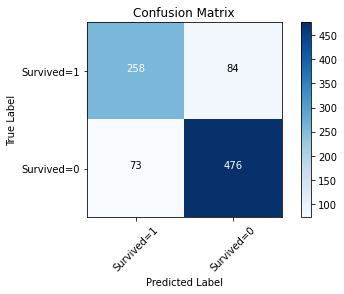


----------------------------------------------------

The area under the curve (AUC) is:  0.8682665984938058


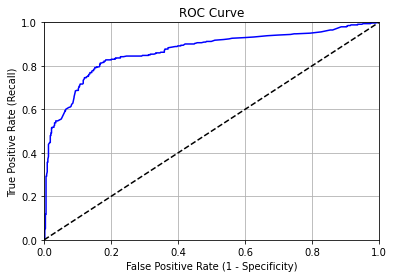

In [545]:
evaluate_classifier(gs.best_estimator_, X_train, y_train)

Overall the best voting classifier performs better than the AdaBoosting, although this AdaBooster is one of the best classifier by now predicting the positive target. Let's add it to the voting classifier and see the results.

In [546]:
ada_clf = AdaBoostClassifier(n_estimators = 17, learning_rate = 0.6)

In [547]:
voting_clf = VotingClassifier(
                  estimators=[('lr', pipe_lg), ('rf', random_forest), ('ada', ada_clf)],
                  voting = 'soft')



Training F1 score:  0.8083832335329342
The mean cross validation f1 score is:  0.7662060748177528
The standard deviation of the cross validation f1 score is:  0.06370852106766013


Confusion Matrix (without normalization)
[[254  88]
 [ 63 486]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.80      0.74      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



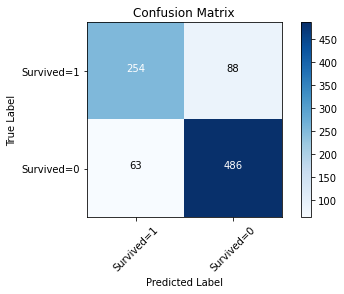


----------------------------------------------------

The area under the curve (AUC) is:  0.8712891061898828


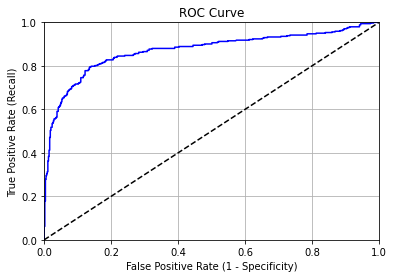

In [549]:
evaluate_classifier(voting_clf, X_train, y_train)

The results are a little bit worse comparing to the Voting Classifier with only the Random Forest and the Logistic Regression.

---

- Gradient Boosting

Another very popular Boosting algorithm is Gradient Boosting. Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor. 

Let's start tuning this classifier.

In [550]:
#Dictionary with the hyperparameters
parameters = {'n_estimators':range(2,30,2), 'learning_rate':np.arange(0.1,1,0.1), 'loss':('deviance', 'exponential'),
              'subsample':(0.6,0.7,0.8,0.9,1), 'max_depth':(2,20,1), 'max_features':('sqrt','log2',0.6,0.7,0.8,0.9,None)}
gb_clf = GradientBoostingClassifier()
gs = RandomizedSearchCV(gb_clf, parameters, cv=10, scoring='roc_auc', n_jobs=-1, n_iter=200)
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'loss': ('deviance', 'exponential'),
                                        'max_depth': (2, 20, 1),
                                        'max_features': ('sqrt', 'log2', 0.6,
                                                         0.7, 0.8, 0.9, None),
                                        'n_estimators': range(2, 30, 2),
                                        'subsample': (0.6, 0.7, 0.8, 0.9, 1)},
                   scoring='roc_auc')

In [551]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_features,param_max_depth,param_loss,param_learning_rate,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.606332,0.036848,0.005497,0.001024,0.7,24,0.6,20,exponential,0.3,...,0.897594,0.904278,0.855882,0.851872,0.828610,0.921123,0.883333,0.858087,0.051469,108
1,0.551312,0.024062,0.006337,0.003170,0.6,22,0.8,20,deviance,0.4,...,0.893048,0.910695,0.842781,0.851337,0.812834,0.903209,0.892063,0.848712,0.058491,143
2,0.160446,0.013987,0.010857,0.011575,1,8,0.8,20,deviance,0.1,...,0.901604,0.893048,0.837166,0.847059,0.817380,0.886364,0.869312,0.840972,0.054980,163
3,0.213030,0.009973,0.003561,0.004660,0.9,10,0.9,20,deviance,0.9,...,0.894920,0.848930,0.782620,0.847326,0.821390,0.896791,0.839153,0.833573,0.046335,177
4,0.021461,0.007924,0.005825,0.006067,0.7,16,log2,1,deviance,0.4,...,0.903476,0.879412,0.868717,0.872460,0.861497,0.913369,0.894974,0.865474,0.041978,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.016200,0.004566,0.006086,0.006542,1,14,None,1,exponential,0.4,...,0.901070,0.881818,0.860963,0.871123,0.875401,0.900535,0.885714,0.865720,0.040797,72
196,0.023694,0.007667,0.003854,0.001634,0.9,14,sqrt,2,exponential,0.9,...,0.920588,0.904011,0.863369,0.868717,0.851872,0.936631,0.908466,0.871912,0.048685,18
197,0.020007,0.008948,0.004398,0.001624,0.8,8,0.7,2,deviance,0.8,...,0.910963,0.855882,0.859626,0.891711,0.862299,0.881818,0.912434,0.865971,0.039048,69
198,0.362792,0.051222,0.004298,0.001675,0.9,18,0.6,20,exponential,0.3,...,0.893048,0.889305,0.850267,0.822193,0.827273,0.930214,0.889683,0.850964,0.057891,134


In [552]:
gs.best_score_

0.879979769685652

In [553]:
gs.best_params_

{'subsample': 0.7,
 'n_estimators': 18,
 'max_features': None,
 'max_depth': 2,
 'loss': 'deviance',
 'learning_rate': 0.30000000000000004}



Training F1 score:  0.793939393939394
The mean cross validation f1 score is:  0.7702180843176096
The standard deviation of the cross validation f1 score is:  0.04764275959670167


Confusion Matrix (without normalization)
[[250  92]
 [ 64 485]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.80      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



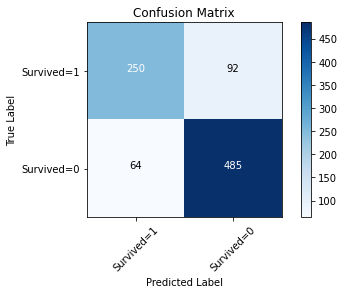


----------------------------------------------------

The area under the curve (AUC) is:  0.8674756867883127


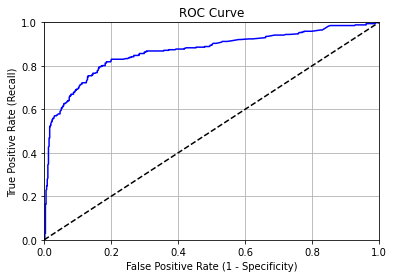

In [556]:
gb_clf = GradientBoostingClassifier(subsample=0.7, n_estimators=18, max_features=None, 
                                    max_depth=2, loss='deviance', learning_rate=0.3)
evaluate_classifier(gs.best_estimator_, X_train, y_train)

The gradient boosting performs significantly worse than the best model so far.

**The best model evaluate was the voting classifier including the Logistic Regression and the Random Forest.** 

In [558]:
voting_clf = VotingClassifier(
                  estimators=[('lr', pipe_lg), ('rf', random_forest)],
                  voting = 'soft')

Let's see the point in the ROC curve with different thresholds.

True Positive Rate:  0.7543859649122807
False Positive Rate:  0.11475409836065574
True Positive Rate:  0.716374269005848
False Positive Rate:  0.08925318761384335
True Positive Rate:  0.7894736842105263
False Positive Rate:  0.13479052823315119


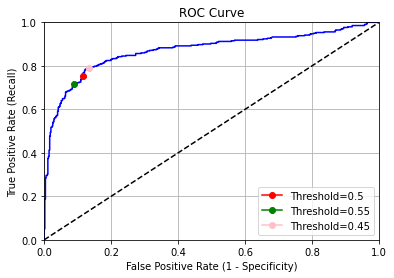

In [574]:
 y_pred_proba = cross_val_predict(voting_clf, X_train, y_train, cv=10, method = 'predict_proba')

fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba[:,1]) #Use the predicited probability for class 1
#Plot the ROC Curve
plt.plot(fpr, tpr, color = 'blue')
#Plot division line
plt.plot([0,1],[0,1], color='black', linestyle='dashed')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC Curve')
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)
x, y = evaluate_threshold(tpr, fpr, thresholds, threshold = 0.5)
plt.plot(x,y, marker='o', color='red', label = 'Threshold=0.5')
x, y = evaluate_threshold(tpr, fpr, thresholds, threshold = 0.55)
plt.plot(x,y, marker='o', color='green', label = 'Threshold=0.55')
x, y = evaluate_threshold(tpr, fpr, thresholds, threshold = 0.45)
plt.plot(x,y, marker='o', color='pink', label = 'Threshold=0.45')

plt.legend(loc='best')
plt.show()
    

The threshold of 0.5 is almost optimal. We can make our model more equilibrated incresing the recall (reducing false negatives) by reducing the threshold. The optimal threshold is 0.45 and is represented in pink.


 Evaluation with a threshold of 0.45 

Confusion Matrix (without normalization)
[[271  71]
 [ 74 475]]


 ------Classification Report------


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       549
           1       0.79      0.79      0.79       342

    accuracy                           0.84       891
   macro avg       0.83      0.83      0.83       891
weighted avg       0.84      0.84      0.84       891



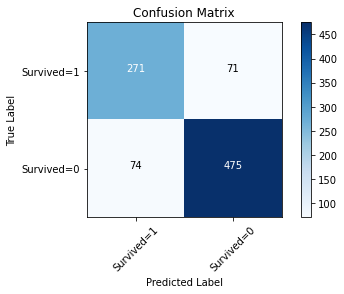

In [590]:
threshold_evaluation(voting_clf, X_train, y_train, threshold=0.45)

The confusion matrix is more equilibrated with a threshold of 0,45.

### Final Predictions

In [562]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('minmaxscaler',
                                                                                MinMaxScaler(),
                                                                                ['Fare',
                                                                                 'Family_Size',
                                                                                 'Age',
                                                                                 'SibSp',
                                                                                 'Parch'])])),
                                              ('logisticregression',
                                               LogisticRegression(C=1.5,
              

In [575]:
predictions_proba = voting_clf.predict_proba(X_test)

In [577]:
predictions_proba

array([[0.90517616, 0.09482384],
       [0.45453403, 0.54546597],
       [0.88664782, 0.11335218],
       [0.89896853, 0.10103147],
       [0.41294197, 0.58705803],
       [0.90156721, 0.09843279],
       [0.3291948 , 0.6708052 ],
       [0.89263717, 0.10736283],
       [0.2145948 , 0.7854052 ],
       [0.93373616, 0.06626384],
       [0.91614976, 0.08385024],
       [0.79907631, 0.20092369],
       [0.02480354, 0.97519646],
       [0.9312333 , 0.0687667 ],
       [0.03704093, 0.96295907],
       [0.09243216, 0.90756784],
       [0.85256363, 0.14743637],
       [0.87393389, 0.12606611],
       [0.47777128, 0.52222872],
       [0.32785307, 0.67214693],
       [0.78651305, 0.21348695],
       [0.25350197, 0.74649803],
       [0.03536636, 0.96463364],
       [0.68783504, 0.31216496],
       [0.12160276, 0.87839724],
       [0.95279533, 0.04720467],
       [0.02161868, 0.97838132],
       [0.8737417 , 0.1262583 ],
       [0.56690613, 0.43309387],
       [0.9164407 , 0.0835593 ],
       [0.

In [580]:
predictions = (predictions_proba[:,1] >= 0.45).astype('int')

In [581]:
predictions.sum()

175

In [582]:
X_test.shape

(417, 18)

The Voting Classifier predicted that 175 people in the testing dataset survived. This values corresponds to 42% of the total passengers in the testing data. 

In [586]:
predictions_results = pd.DataFrame({'Age':X_test.Age,'Srvived':predictions})
#First 30 results
predictions_results.head(30)

,Age,Srvived
0,34,0
1,47,1
2,62,0
3,27,0
4,22,1
5,14,0
6,30,1
7,26,0
8,18,1
9,21,0
